<a href="https://colab.research.google.com/github/Pkolekar940/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Pramod Kolekar

# **Project Summary -**

This project focuses on analyzing restaurant data in India to uncover insights into cuisines, costs, ratings, collections, and sentiments. The process involves data wrangling, dimensionality reduction, and implementing ML models like K-means and hierarchical clustering. Topic modeling using LDA and sentiment analysis are also employed. The findings provide valuable information on popular cuisines, restaurant affordability, rating patterns, and customer sentiments. Recommendations and future work suggestions are included for further exploration.

**Data Preprocessing**:

1. **Dataset Acquisition**: Obtained the Zomato restaurant dataset for analysis.
2. **Library Integration**: Imported necessary libraries for data manipulation and analysis.
3. **Data Import**: Loaded the Zomato dataset into the analysis environment.
4. **Missing Data Handling**: Addressed any missing values in the dataset.
5. **Categorical Data Encoding**: Converted categorical data into numerical format for machine learning compatibility.
6. **Data Cleaning and Feature Engineering**: Performed data cleaning and created new features to enhance the dataset's quality.

**Exploratory Data Analysis (EDA)**:

1. **Top 5 Cuisines**: Identified the top 5 cuisines in the dataset using a pie chart.
2. **Restaurant Cost Distribution**: Visualized the distribution of restaurants based on their cost using a histogram or bar chart.
3. **Most Expensive and Affordable Restaurants**: Identified the most expensive and most affordable restaurants in the dataset.
4. **Frequency Distribution of Collections**: Analyzed the frequency distribution of restaurant collections (types) to understand popular categories.
5. **Overall Distribution of Restaurant Ratings**: Plotted a histogram to visualize the distribution of restaurant ratings across the dataset.
6. **Rating Variation over Hours**: Created a Plotly barchart to explore how restaurant ratings change over different hours of the day.
7. **Clustering Result Visualization**: Utilized scatter plots to visualize the clustering result obtained from K-means or hierarchical clustering.
8. **Dendrogram**: Generated a dendrogram to display the hierarchy of clusters in hierarchical clustering.

**Machine Learning Model Implementation**:

1. **K-means**: Used K-means algorithm for clustering restaurants based on similarities.
2. **Silhouette Score Graph**: Plotted a graph to determine the optimal number of clusters using the silhouette score.
3. **Hierarchical Clustering**: Employed hierarchical clustering and created a dendrogram to visualize the hierarchy of clusters.

**Topic Modeling using LDA**:

Performed topic modeling using Latent Dirichlet Allocation (LDA) on restaurant reviews to identify key topics and themes.

**Sentiment Analysis**:

Conducted sentiment analysis on restaurant reviews to determine positive, negative, and neutral sentiments, gaining insights into customer preferences and satisfaction levels.

**Conclusion**:

The Zomato Restaurant Clustering and Sentiment Analysis project successfully conducted exploratory data analysis on the dataset, revealing valuable insights about the top cuisines, restaurant cost distribution, and popular restaurant categories. Clustering analysis using K-means and hierarchical clustering allowed for grouping similar restaurants. Additionally, topic modeling and sentiment analysis provided deeper insights into customer reviews and preferences. The project's findings can help restaurant owners and stakeholders make informed decisions and improve their services to cater to customer needs effectively.

# **GitHub Link -**

# **Problem Statement**


The project aims to cluster restaurants based on their attributes using unsupervised learning techniques and perform sentiment analysis on customer reviews to understand the overall sentiment towards restaurants listed on Zomato.


   - What are the top 5 cuisines based on the pie chart?
   - How is the distribution of restaurants by cost?
   - Which are the most expensive and most affordable restaurants?
   - What is the frequency distribution of collections?
   - How are restaurant ratings distributed overall?
   - What does the Plotly barchart reveal about ratings over the hour?
   - How is the heatmap used in the data analysis?
   - How were outliers handled using IQR?
   - What are the key steps in textual data preprocessing?
   - How was Dimensionality reduction achieved using PCA?


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [181]:
# Import Libraries
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import time
from wordcloud import WordCloud

from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#importing kmeans
from sklearn.cluster import KMeans

#Non-negative matrix Factorization
from sklearn.decomposition import NMF

#principal component analysis
from sklearn.decomposition import PCA


#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

#import stemmer
from nltk.stem.snowball import SnowballStemmer

#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Dataset Loading

In [182]:
# Load the database of Rastaurant

url='https://drive.google.com/file/d/1m4lylf_iAyxlsIW1uTGrMSuhHYwuntJl/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df1 = pd.read_csv(url)

In [183]:
# Load the database of Review

url='https://drive.google.com/file/d/1JG_8OGZ6tS-0SOstH_x3n9sN0ZI1AFNC/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df2 = pd.read_csv(url)


### Dataset First View

In [184]:
# Dataset First Look of Rastaurant
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [185]:
# Dataset last Look of Rastaurant
df1.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [186]:
# Dataset first look of Review
df2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [187]:
# Dataset Rows & Columns count of Restaurant
df1.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [188]:
# Dataset Rows & Columns count of Review
df2.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

### Dataset Information

In [189]:
# Dataset Info of Restaurant
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [190]:
# Dataset Info of Review
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [191]:
# Dataset Duplicate Value Count of Restaurant
df1.duplicated().sum()

0

In [192]:
# Dataset Duplicate Value Count of Review
df2.duplicated().sum()

36

#### Missing Values/Null Values

In [193]:
# Missing Values/Null Values Count of Restaurant
df1.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [194]:
# Missing Values/Null Values Count of Review
df2.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

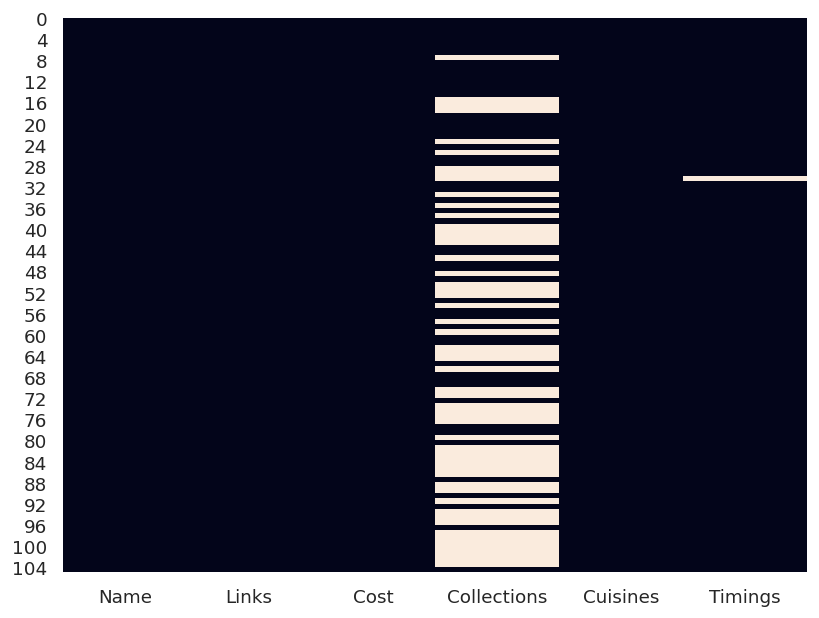

In [195]:
# Let's Visualizing the missing values of Restaurant
# to visualize missing data we can use the heatmap method.

# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":120, "figure.figsize":(8,6)})
sns.heatmap(df1.isnull(), cbar=False)

<Axes: >

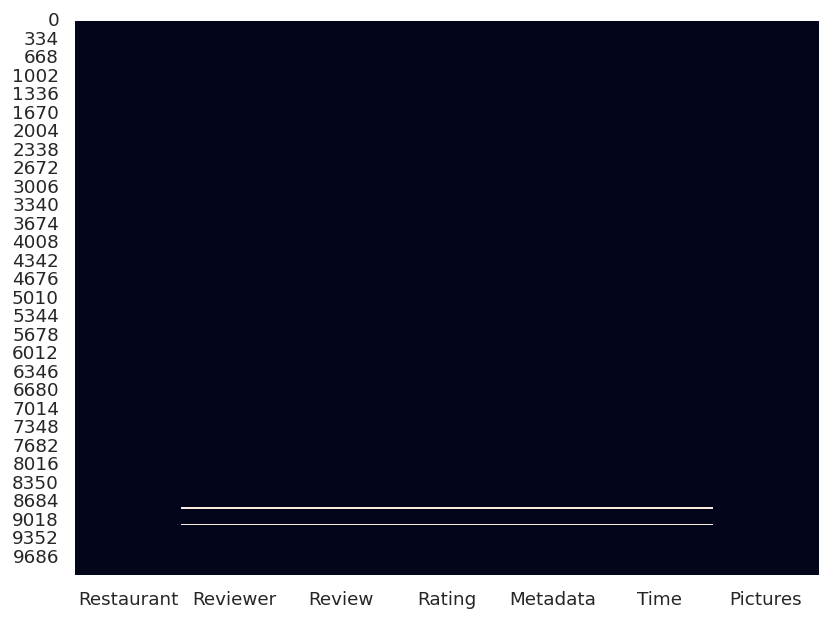

In [196]:
# Let's Visualizing the missing values
# to visualize missing data we can use the heatmap method.

# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":120, "figure.figsize":(8,6)})
sns.heatmap(df2.isnull(), cbar=False)

### What did you know about your dataset?

Restaurant DataSet:
- 105 observations with 6 features.
- "Collection" and "Timing" features have null values.
- No duplicate values, all 105 data points are unique.
- "Cost" feature represents amounts but has an object data type due to comma separation.
- "Timing" represents operational hours as text with an object data type.

Review DataSet:
- 10000 observations with 7 features.
- Except "Picture" and "Restaurant" features, all others have null values.
- There are 36 duplicate values for two restaurants - "American Wild Wings" and "Arena Eleven," where these duplicates mostly have null values.
- "Rating" represents ordinal data but has an object data type; it should be converted to an integer.
- "Timing" represents the time when reviews were posted as object data; it should be converted into date-time format.

## ***2. Understanding Your Variables***

In [197]:
# Dataset Columns of Restaurant
df1.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [198]:
# Dataset Describe
df1.describe(include='all').T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [199]:
# Let's have info of Restaurants dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [200]:
# Dataset Columns of Review
df2.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [201]:
# Dataset Describe of Review
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


### Variables Description

$\color{green}{\text{Dataset 1}}$

$\color{red}{\text{Name}}$ - Name of Restaurants  
$\color{red}{\text{Links}}$ - URL Links of Restaurants  
$\color{red}{\text{Cost}}$ - Per Person estimated cost of dining  
$\color{red}{\text{Collection}}$ - Tagging of Restaurant with respect to Zomato categories  
$\color{red}{\text{Cuisines}}$ - Cuisines served by restaurants  
$\color{red}{\text{Timings}}$ - Restaurant timings

$\color{green}{\text{Dataset 2}}$

$\color{red}{\text{Restaurant}}$: Name of the restaurants being reviewed.

$\color{red}{\text{Reviewer}}$: Name of the reviewer providing the review.

$\color{red}{\text{Review}}$: The text of the review.

$\color{red}{\text{Rating}}$: The rating provided by the reviewer.

$\color{red}{\text{MetaData}}$: Information about the reviewer, such as the number of reviews they have given and the number of followers they have.

$\color{red}{\text{Time}}$: Date and time of the review.

$\color{red}{\text{Pictures}}$: Number of pictures posted along with the review.


### Check Unique Values for each variable.

In [202]:
# Let's Check Unique Values  of df1 for each variable

for ele in df1:
  print(f'Number of unique values in {ele} is {df1[ele].nunique()}.')

Number of unique values in Name is 105.
Number of unique values in Links is 105.
Number of unique values in Cost is 29.
Number of unique values in Collections is 42.
Number of unique values in Cuisines is 92.
Number of unique values in Timings is 77.


In [203]:
# Let's Check Unique Values of review for each variable.

for ele in df2:
  print(f'Number of unique values in {ele} is {df2[ele].nunique()}.')

Number of unique values in Restaurant is 100.
Number of unique values in Reviewer is 7446.
Number of unique values in Review is 9364.
Number of unique values in Rating is 10.
Number of unique values in Metadata is 2477.
Number of unique values in Time is 9782.
Number of unique values in Pictures is 36.


## ***3.  Data Wrangling***

In [204]:
# Let's remove duplicate value from df2 Dataframe.
df2.drop_duplicates(inplace=True)

In [205]:
# Missing Values/Null Values Count of Review
df2.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [206]:
# Let's exploring null values in review coloumn
df2[df2["Review"].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8844,Domino's Pizza,Sayan Gupta,NaN,5,"2 Reviews , 2 Followers",8/9/2018 21:41,0
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaN,0


In [207]:
# Drop rows where the "Review" column is null
df2.dropna(subset=["Review"], inplace=True)

In [208]:
# changing the data type of the cost function of Restaurant
df1['Cost'] = df1['Cost'].str.replace(",","").astype('int64')

In [209]:
# Let's Extract Year, Month, Day and Hour from Column Time.
df2['Time']=pd.to_datetime(df2['Time'])
df2['Year']=df2['Time'].dt.year
df2['Month']=df2['Time'].dt.month
df2['Day']=df2['Time'].dt.day_name()
df2['Hour']=df2['Time'].dt.hour
# df2.drop(['Time'], axis=1, inplace=True)

In [210]:
# substitutiong 'like' observation first by nan values ans then by mean of the feature
df2.loc[df2['Rating'] == 'Like'] = np.nan
df2['Rating'] = df2['Rating'].astype('float64')
print(df2['Rating'].mean())

3.600261201527024


In [211]:
# storing all the cusines of Restaurant
cuisine_value_list = df1['Cuisines'].str.split(', ').apply(lambda x: [cuisine.strip() for cuisine in x])


In [212]:
# converting the dict to a data frame
cuisine_counter = Counter([cuisine for cuisine_names in cuisine_value_list for cuisine in cuisine_names])
cuisine_df = pd.DataFrame.from_dict(cuisine_counter, orient='index', columns=['Number of Restaurants']).reset_index().rename(columns={'index': 'Cuisine'})
top_5_cuisines = cuisine_df.sort_values('Number of Restaurants', ascending=False).head(5)


In [213]:
# Let's print top cuisines
print(top_5_cuisines)

         Cuisine  Number of Restaurants
5   North Indian                     61
0        Chinese                     43
1    Continental                     21
6        Biryani                     16
18     Fast Food                     15


In [214]:
# Renaming in dataframe "Name" to "Restaurant"
df1 = df1.rename(columns = {'Name':'Restaurant'})

### What all manipulations have you done and insights you found?


1) Duplicate values from the Review dataframe were dropped to ensure data integrity.

2) Null values in the review dataframe were removed to clean the data and avoid any potential biases.

3) The data type of the 'cost' function was converted from string to integer to facilitate numerical analysis.

4) The Year, Month, Day, and Hour components were extracted from the 'Time' column to enable temporal analysis.

5) The 'like' observations were first substituted with NaN values and then replaced with the mean of the feature to handle missing data appropriately.

6) A separate cuisine dataframe was created to analyze the various cuisines served by the restaurants.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

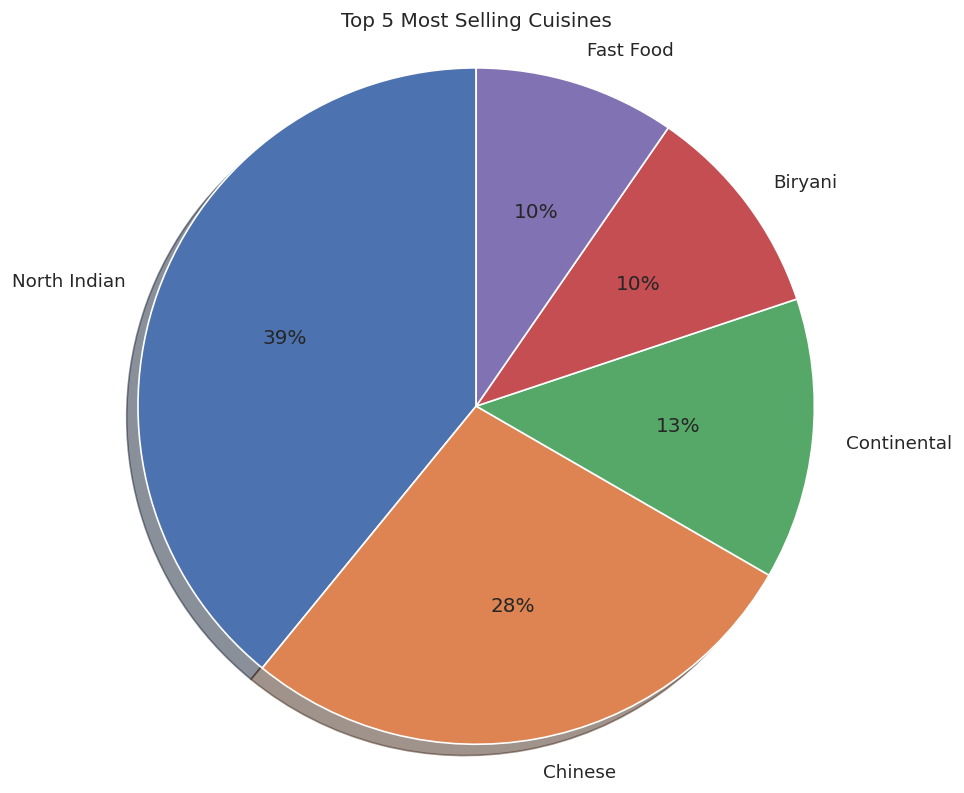

In [215]:
# Let's plot a pie chart for the top 5 cuisines

# Data for the pie chart
top_5_cuisines = {
    'Cuisine': ['North Indian', 'Chinese', 'Continental', 'Biryani', 'Fast Food'],
    'Number of Restaurants': [61, 43, 21, 16, 15]
}

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_cuisines['Number of Restaurants'], labels=top_5_cuisines['Cuisine'], autopct='%.0f%%', startangle=90, shadow=True)

# Set title and aspect ratio
plt.title('Top 5 Most Selling Cuisines')
plt.axis('equal')

# Show the pie chart
plt.show()


##### 1. Why did you pick the specific chart?

It is useful for identifying the distribution of data across categories at a glance.

##### 2. What is/are the insight(s) found from the chart?

North indian and chinese cuisines are high selling food

#### Chart - 2

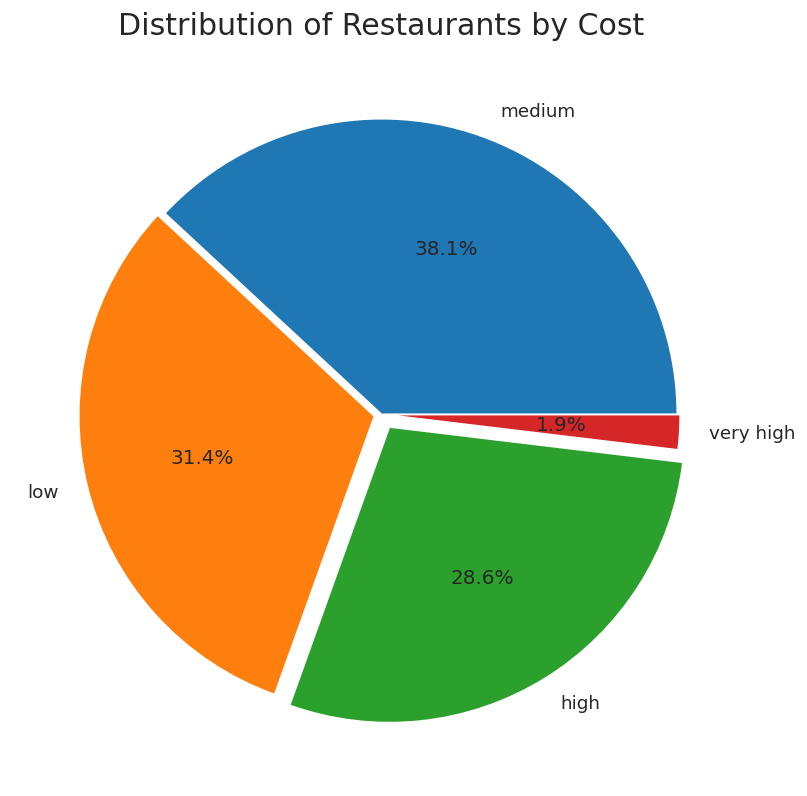

In [216]:
# Let's find what is distribution of restaurants based on cost
# Let's Define the cost categories and corresponding labels
cost_categories = {
    'low': (0, 500),
    'medium': (500, 1000),
    'high': (1000, 2000),
    'very high': (2000, float('inf'))
}

# Categorize df1s based on their cost
def categorize_cost(cost):
    for category, (min_cost, max_cost) in cost_categories.items():
        if min_cost <= cost <= max_cost:
            return category

# Apply the categorization function to the 'Cost' column
df1['Cost Category'] = df1['Cost'].apply(categorize_cost)

# Count the number of df1s in each cost category
cost_category_counts = df1['Cost Category'].value_counts()
plt.figure(figsize=(8, 8))
# Create a pie chart
explode = (0, 0.025, 0.05, 0.01)  # Explode the 'medium' slice
plt.pie(cost_category_counts, labels=cost_category_counts.index, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], explode=explode)

# Set the title
plt.title('Distribution of Restaurants by Cost', fontsize=18)

# Show the plot
plt.show()


##### What is/are the insight(s) found from the chart?

Majority are in medium and low categories, while only a small percentage are very high. Valuable insights for business decisions and marketing.

#### Chart - 3

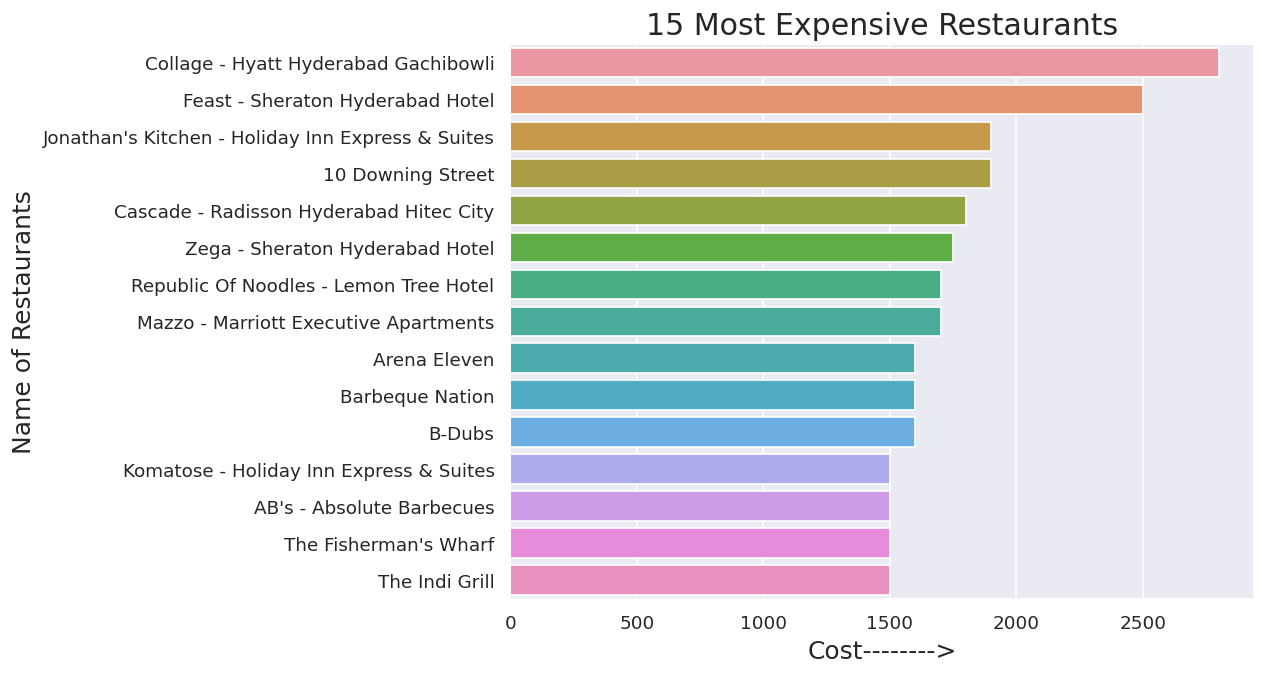

In [217]:
# Let's check for most expensive Restaurant
sns.barplot(x='Cost',
            y="Restaurant",
            data=df1,
            order=df1.sort_values('Cost', ascending=False).Restaurant[:15])

plt.title('15 Most Expensive Restaurants', fontsize=18)
plt.xlabel('Cost-------->', fontsize=15)
plt.ylabel('Name of Restaurants', fontsize=15)

plt.show()


##### 1. Why did you pick the specific chart?

Bar char is useful to comparing data across categories of groups

##### 2. What is/are the insight(s) found from the chart?

Collage- Hyatt Hyderabad Gachibowli Restaurant is so expensive followed by Feast- sheraton Hyderbad Hotel

#### Chart - 4

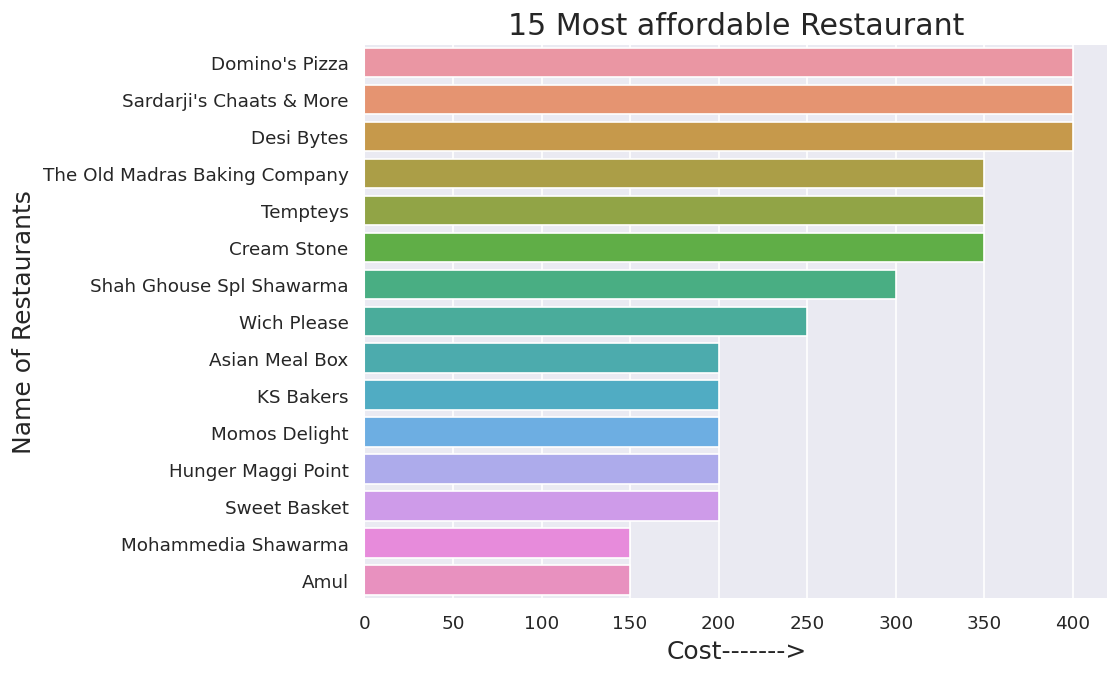

In [218]:
# checking for most affordable Restaurant
sns.barplot(x='Cost',
            y="Restaurant",
            data=df1,
            order=df1.sort_values('Cost',ascending=False).Restaurant[-15:])

plt.title('15 Most affordable Restaurant', fontsize=18)
plt.xlabel('Cost------->', fontsize=15)
plt.ylabel('Name of Restaurants', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Bar char is useful to comparing data across categories of groups of restaurants.

##### 2. What is/are the insight(s) found from the chart?

I found that Amul is the restaurant at lowest cost that is 150 followed by Mohammedia Shawarma.

#### Chart - 5

(-0.5, 1399.5, 1399.5, -0.5)

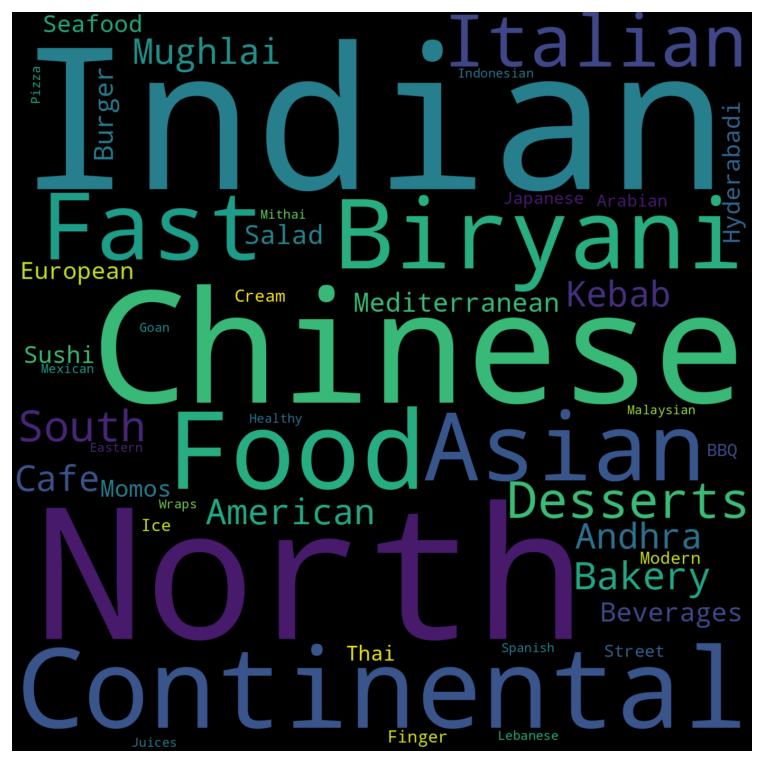

In [219]:
# Creating the text variable
plt.figure(figsize=(15,8))
text = " ".join(name for name in df1.Cuisines )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

##### 1. Why did you pick the specific chart?

Word cloud is an essential data visualization tool that concisely displays word frequencies.

##### 2. What is/are the insight(s) found from the chart?

Word cloud analysis reveals North Indian, Chinese, Continental, and fast food as the most preferred restaurant cuisines.

#### Chart - 6

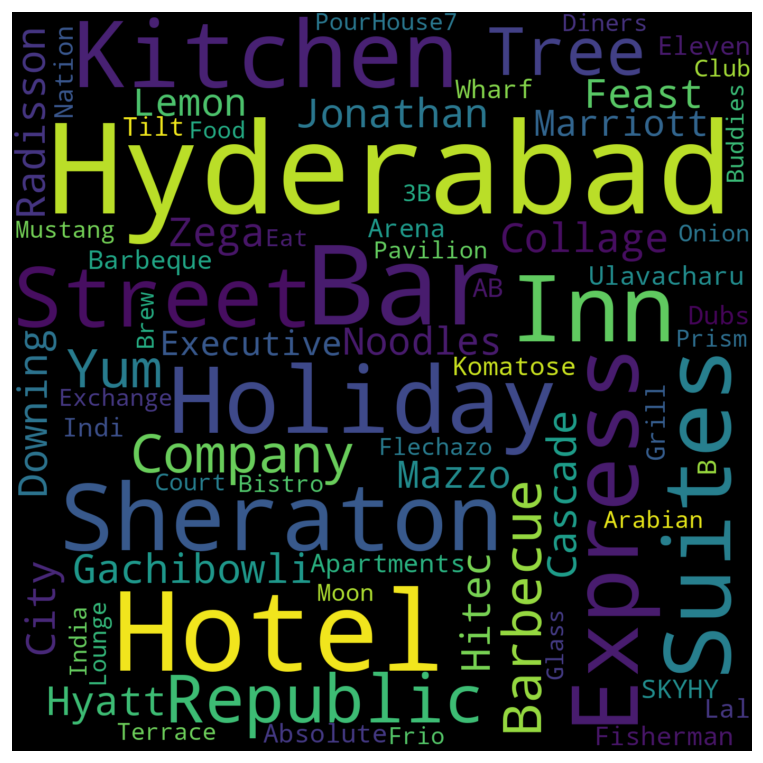

In [220]:
# Creating word cloud for expensive restaurants.
plt.figure(figsize=(15,8))
text = " ".join(name for name in df1.sort_values('Cost',ascending=False).Restaurant[:30])

# Creating word_cloud with text as argument in .generate() method.
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud.
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off");

##### 1. Why did you pick the specific chart?

Word cloud is helpfull for identify prominent themes, patterns, or trends within a text or dataset.

##### 2. What is/are the insight(s) found from the chart?

The word cloud analysis of restaurant names highlights frequent occurrences of "Hyderabad," "Sheraton," "Suites," and "Holiday."

#### Chart - 7

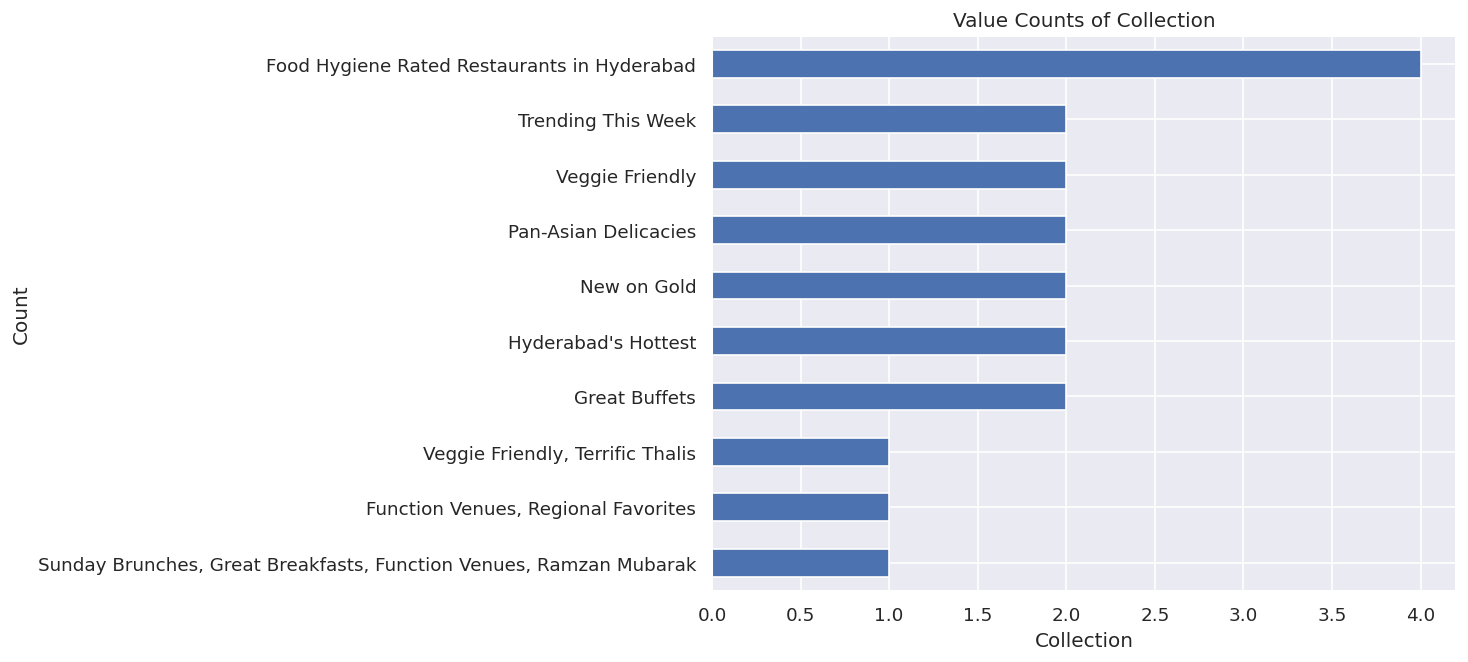

In [221]:
# Let's have look on frequency distribution of Collections.
df1['Collections'].value_counts()[0:10].sort_values().plot(kind='barh')
plt.xlabel('Collection')
plt.ylabel('Count')
plt.title('Value Counts of Collection')
plt.show()

##### 1. Why did you pick the specific chart?

Value count bar charts visually display the frequency distribution of categorical data, providing quick insights into data patterns and helping identify dominant categories.

##### 2. What is/are the insight(s) found from the chart?

Most frequent Collection is Food Hygiene Rated Restaurants in Hyderabad followed by others collect like Trending this week, veggie friendly so on.

#### Chart - 8

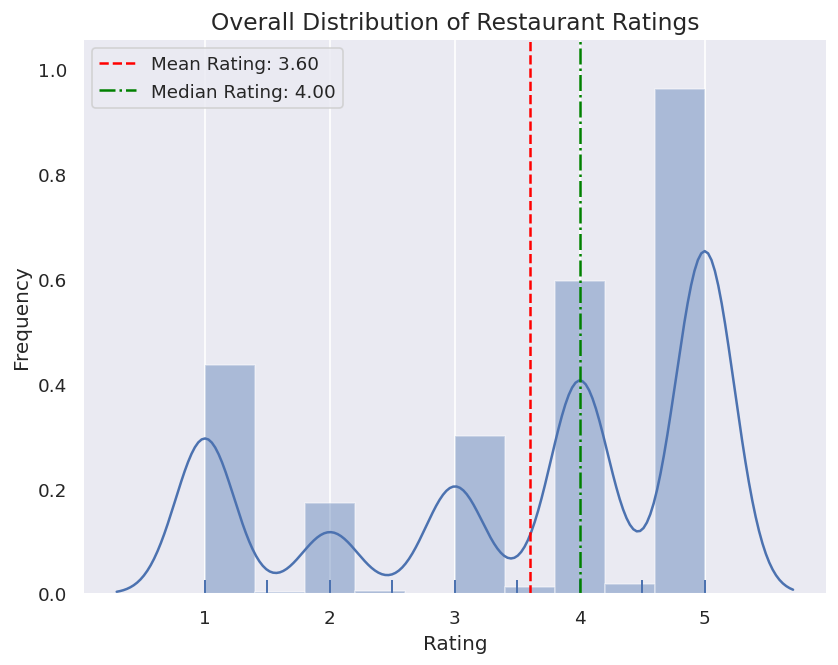

In [222]:
# Let's see overall distribution of restaurant ratings
plt.figure(figsize=(8, 6))
sns.distplot(df2['Rating'], bins=10, kde=True, rug=True)
plt.xlabel('Rating',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Overall Distribution of Restaurant Ratings',fontsize=14)
plt.xticks(range(1, 6))  # Set x-axis ticks to range from 1 to 5 (ratings scale)
plt.grid(axis='y')  # Add gridlines to the y-axis for better readability

# Calculate mean and median
mean_rating = df2['Rating'].mean()
median_rating = df2['Rating'].median()

# Plot mean line
plt.axvline(mean_rating, color='red', linestyle='--', label=f'Mean Rating: {mean_rating:.2f}')

# Plot median line
plt.axvline(median_rating, color='green', linestyle='-.', label=f'Median Rating: {median_rating:.2f}')

plt.legend()  # Show legend with mean and median labels

plt.show()



##### 1. Why did you pick the specific chart?

Distplot is useful for visually understanding the distribution of a numerical variable, providing insights into the data's central tendency, spread, and overall shape.

##### 2. What is/are the insight(s) found from the chart?

The majority of ratings are high (around 5.0), with fewer extreme ratings, suggesting overall positive feedback and few very low ratings.

#### Chart - 9

In [223]:
# Let's plotted plotly barchart for Rating over the hour.
temp_df1 = df2['Hour'].value_counts().reset_index()

# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['Hour'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'RATING OVER THE Hour' , xaxis = dict(title = 'Hour'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

##### 1. Why did you pick the specific chart?

Plotly bar are useful charts due to its interactive and dynamic capabilities, allowing users to explore data.

##### 2. What is/are the insight(s) found from the chart?

The data analysis reveals that the majority of reviews are given during the afternoon and nighttime hours, indicating a higher user engagement and activity during these time periods.

#### Chart - 10

In [224]:
# Let's plot a graph to understand Review distribution
days_count = df2['Day'].value_counts()
total_days = len(df2['Day'])
percentage_days = days_count / total_days * 100

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=days_count.index,
    values=percentage_days,
    hole=0.5,
    textinfo='percent',
    marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])
)])

# Set the title and legend color
title_color = '#8a8d93'
legend_color = 'white'

fig.update_layout(
    title='Reviews Distribution by Day',
    title_font=dict(size=25, color=title_color, family="Lato, sans-serif"),
    plot_bgcolor='#444',
    paper_bgcolor='#444',
    legend=dict(
        bgcolor='rgba(0,0,0,0)',  # Set the legend background color to transparent
        font=dict(color=legend_color)
    )
)

# Display the chart
fig.show(renderer='colab')


##### 1. Why did you pick the specific chart?

Plotly donut are useful charts due to its interactive and dynamic capabilities, allowing users to explore data.

##### 2. What is/are the insight(s) found from the chart?

Donut chart shows peak outing on weekends (Sunday & Saturday), with significant activity on Friday and Wednesday.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

**$\color{blue}{\text{Hypothesis Test 1:}}$** Is there a significant relationship between the cost of a restaurant and the rating it receives?

**$\color{red}{\text{Null Hypothesis (H0):}}$** There is no significant relationship between the cost of a restaurant and the rating it receives.

**$\color{green}{\text{Alternative Hypothesis (H1):}}$** There is a significant relationship between the cost of a restaurant and the rating it receives.



In [225]:
# Let's Merged Restaurant and Review DataFrame on Restaurant column
merged_df = df1.merge(df2, on = 'Restaurant')
merged_df.shape

(9954, 17)

In [226]:

import statsmodels.api as sm

# Step 1: Prepare the data
if 'Rating' not in merged_df.columns or 'Cost' not in merged_df.columns:
    raise ValueError("The 'Rating' and 'Cost' columns are required in the 'merged_df' DataFrame.")

# Drop rows with missing values in 'Rating' or 'Cost' (if necessary)
merged_df.dropna(subset=['Rating', 'Cost'], inplace=True)

# Step 2: Fit the linear regression model
X = merged_df['Cost']   # Independent variable (Cost)
y = merged_df['Rating'] # Dependent variable (Ratings)

# Add a constant term to the independent variable (required for statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Step 3: Check p-value of the coefficient for 'Cost'
p_value = model.pvalues['Cost']

# Step 4: Set the significance level (alpha)
alpha = 0.05

# Step 5: Perform the hypothesis test
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant relationship between the cost of a restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis: There is no significant relationship between the cost of a restaurant and the rating it receives.")

# Step 6: Interpret the results
# Based on the test result, provide a clear interpretation of whether the cost of a restaurant has a significant impact on the ratings it receives.

# Optional: Print the regression summary for additional insights
print(model.summary())


Reject Null Hypothesis: There is a significant relationship between the cost of a restaurant and the rating it receives.
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     211.1
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           2.42e-47
Time:                        05:54:08   Log-Likelihood:                -17946.
No. Observations:                9954   AIC:                         3.590e+04
Df Residuals:                    9952   BIC:                         3.591e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

### Hypothetical Statement - 2

**$\color{blue}{\text{Hypothesis Test 2:}}$** Do restaurants with more pictures receive higher ratings?

**$\color{red}{\text{Null Hypothesis (H0):}}$** There is no significant relationship between the number of pictures and the rating of the restaurant.

**$\color{green}{\text{Alternative Hypothesis (H1):}}$** There is a significant relationship between the number of pictures and the rating of the restaurant.

Test: Perform a Pearson correlation test between the 'Pictures' and 'Rating' columns.

In [227]:
# Step 1: Prepare the data
if 'Rating' not in merged_df.columns or 'Pictures' not in merged_df.columns:
    raise ValueError("The 'Rating' and 'Pictures' columns are required in the 'merged_df' DataFrame.")

# Drop rows with missing values in 'Rating' or 'Pictures' (if necessary)
merged_df.dropna(subset=['Rating', 'Pictures'], inplace=True)

# Step 2: Fit the linear regression model
X = merged_df['Pictures'] # Independent variable (Number of pictures)
y = merged_df['Rating']   # Dependent variable (Ratings)

# Add a constant term to the independent variable (required for statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Step 3: Check p-value of the coefficient for 'Pictures'
p_value = model.pvalues['Pictures']

# Step 4: Set the significance level (alpha)
alpha = 0.05

# Step 5: Perform the hypothesis test
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant relationship between the number of pictures and the ratings of the restaurants.")
else:
    print("Fail to reject Null Hypothesis: There is no significant relationship between the number of pictures and the ratings of the restaurants.")

# Step 6: Interpret the results
# Based on the test result, provide a clear interpretation of whether the number of pictures has a significant impact on the ratings of the restaurants.

# Optional: Print the regression summary for additional insights
print(model.summary())


Reject Null Hypothesis: There is a significant relationship between the number of pictures and the ratings of the restaurants.
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     68.76
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.26e-16
Time:                        05:54:08   Log-Likelihood:                -18016.
No. Observations:                9954   AIC:                         3.604e+04
Df Residuals:                    9952   BIC:                         3.605e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----

##### Which statistical test have you done to obtain P-Value?


I used a linear regression model to obtain the P-value. Linear regression is a statistical method used to model the relationship between a dependent variable (in this case, the rating) and one or more independent variables (in this case, the cost).

##### Why did you choose the specific statistical test?

 linear regression model is a widely-used and versatile statistical test for examining the relationship between two continuous variables and has the advantage of providing both statistical significance testing and practical interpretability of the results.

## ***6. Feature Engineering & Data Pre-processing***

In [228]:
#changing date and extracting few feature for manipulation
df2['Reviewer_Total_Review'],df2['Reviewer_Followers']=df2['Metadata'].str.split(',').str
df2['Reviewer_Total_Review'] = pd.to_numeric(df2['Reviewer_Total_Review'].str.split(' ').str[0])
df2['Reviewer_Followers'] = pd.to_numeric(df2['Reviewer_Followers'].str.split(' ').str[1])

In [229]:
#Price point of restaurants
price_point = merged_df.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})

In [230]:
# price point for high rated restaurants
price_point.nlargest(5,'Rating')

,Restaurant,Rating,Price_Point
3,AB's - Absolute Barbecues,4.88,1500.0
11,B-Dubs,4.81,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
67,Paradise,4.70,800.0
35,Flechazo,4.66,1300.0


In [231]:
# Info of merged data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9953
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9954 non-null   object        
 1   Links          9954 non-null   object        
 2   Cost           9954 non-null   int64         
 3   Collections    4962 non-null   object        
 4   Cuisines       9954 non-null   object        
 5   Timings        9854 non-null   object        
 6   Cost Category  9954 non-null   object        
 7   Reviewer       9954 non-null   object        
 8   Review         9954 non-null   object        
 9   Rating         9954 non-null   float64       
 10  Metadata       9954 non-null   object        
 11  Time           9954 non-null   datetime64[ns]
 12  Pictures       9954 non-null   float64       
 13  Year           9954 non-null   float64       
 14  Month          9954 non-null   float64       
 15  Day            9954 n

In [232]:
# Let's Convert the "Followers" column to integer type and fill null values with zero
df2['Reviewer_Followers'] = df2['Reviewer_Followers'].fillna(0).astype(int)
df2['Reviewer_Total_Review'] = df2['Reviewer_Total_Review'].fillna(0).astype(int)

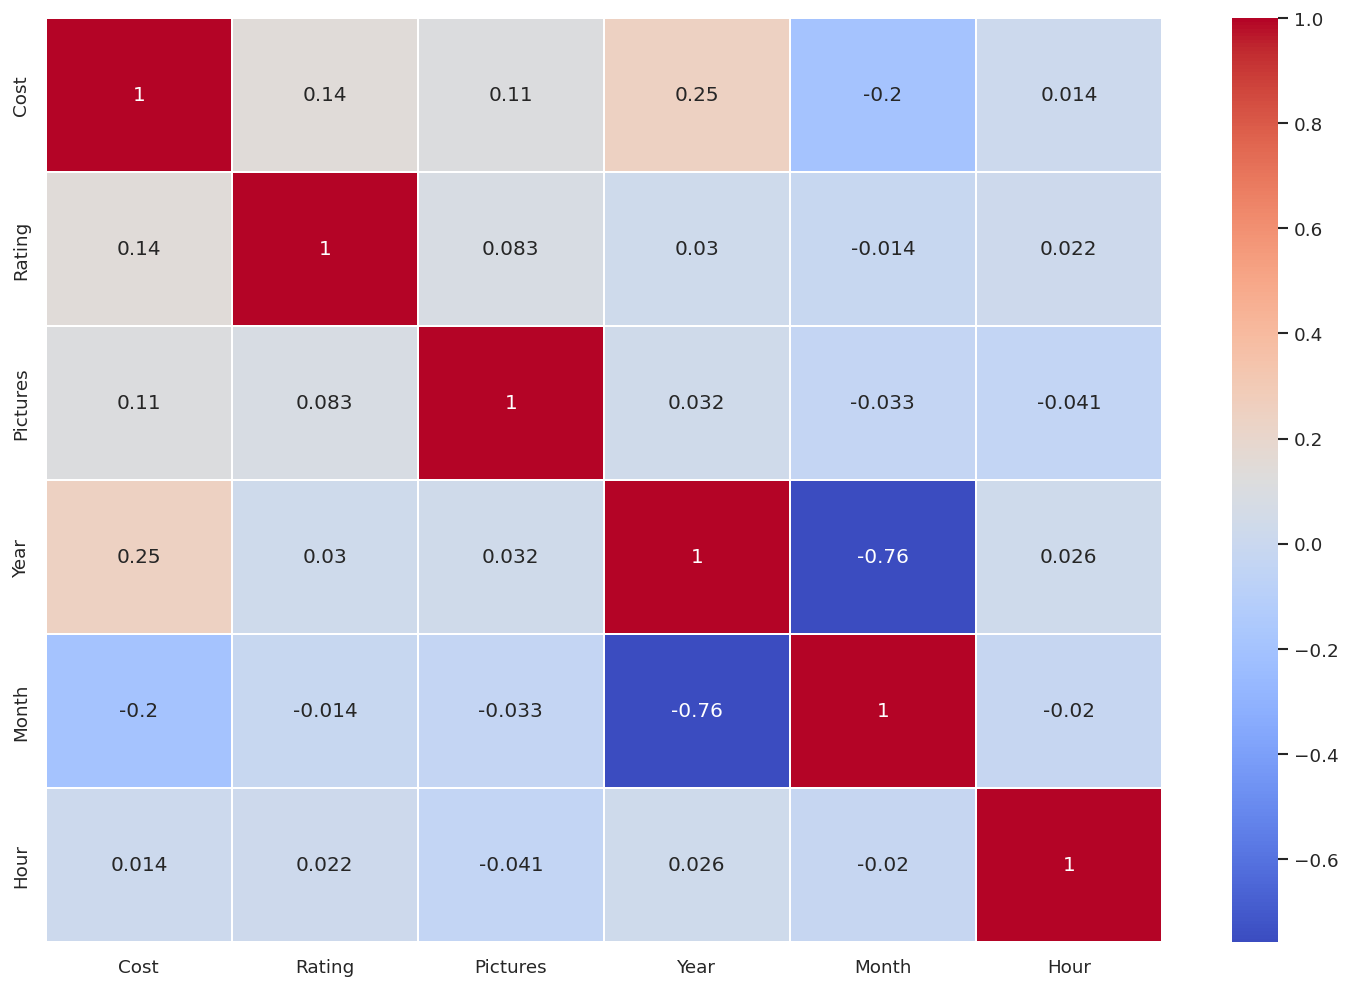

In [233]:
# Let's plot a heatmap visualizes correlation strength between variables
f, ax = plt.subplots(figsize=(15, 10))

# Generate the heatmap using the correlation matrix of the merged_df
sns.heatmap(merged_df.corr(), ax=ax, annot=True, cmap='coolwarm', linewidths=1)

# Show the heatmap
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap: Visualizes correlation strength between variables. Darker colors show strong relationships, while lighter colors indicate weaker connections. Provides valuable insights for informed decision-making.

##### 2. What is/are the insight(s) found from the chart?

1. Cost-Rating: Weak positive (0.144) - Higher cost, slightly higher ratings.
2. Pictures-Reviewer_Total_Review: Moderate positive (0.331) - More pictures, more reviews.
3. Year-Month: Strong negative (-0.758) - As year increases, month decreases (chronological).
4. Cost-Year: Moderate positive (0.250) - Recent years, higher cost.
5. Year-Reviewer_Total_Review: Weak negative (-0.056) - More reviews, earlier years.
6. Reviewer_Total_Review-Reviewer_Followers: Strong positive (0.455) - More reviews, more followers.

### 2. Handling Outliers

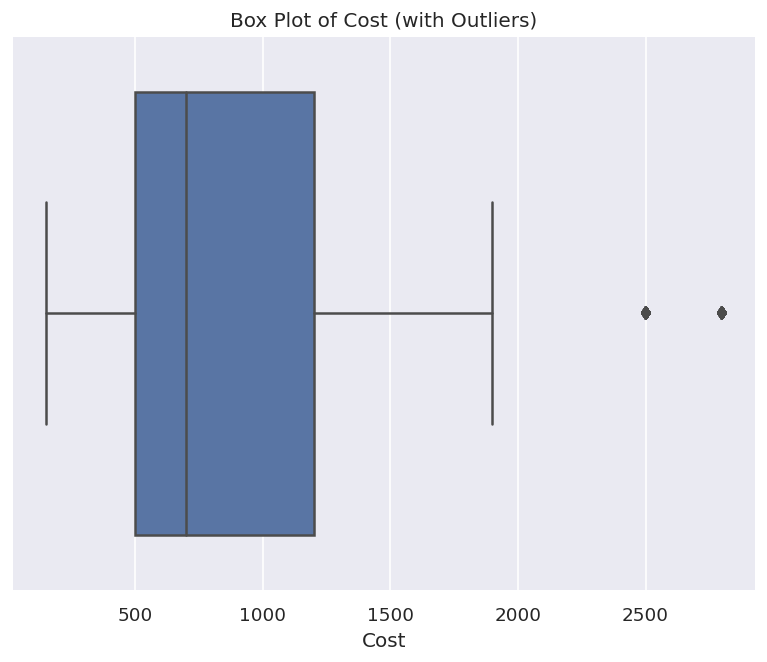

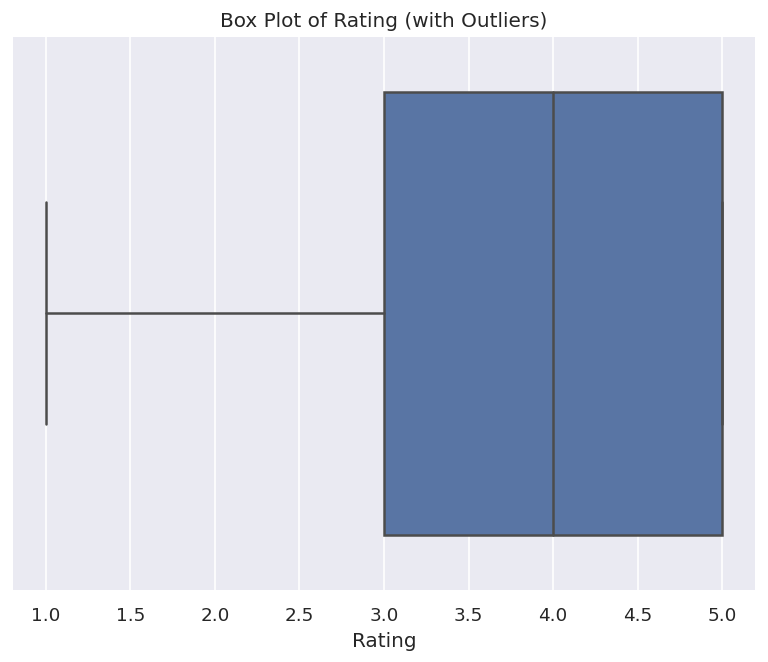

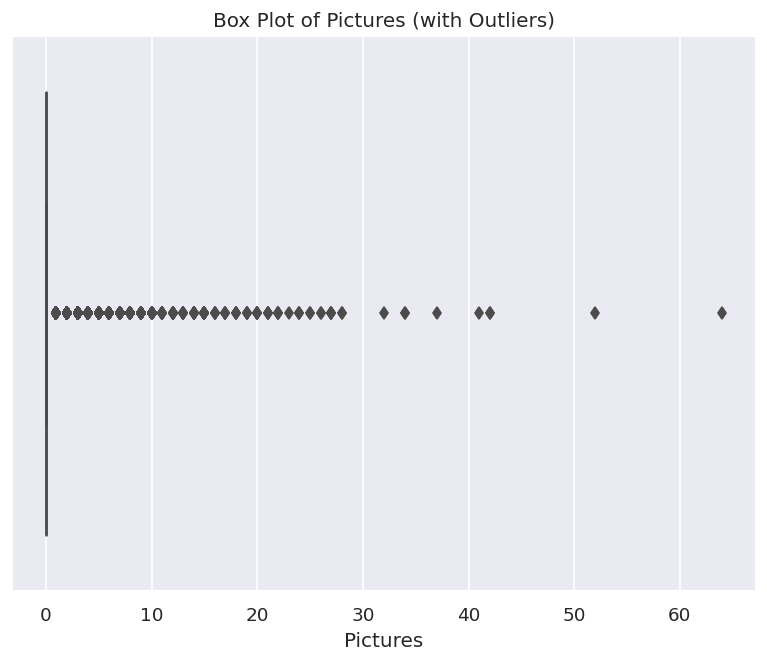

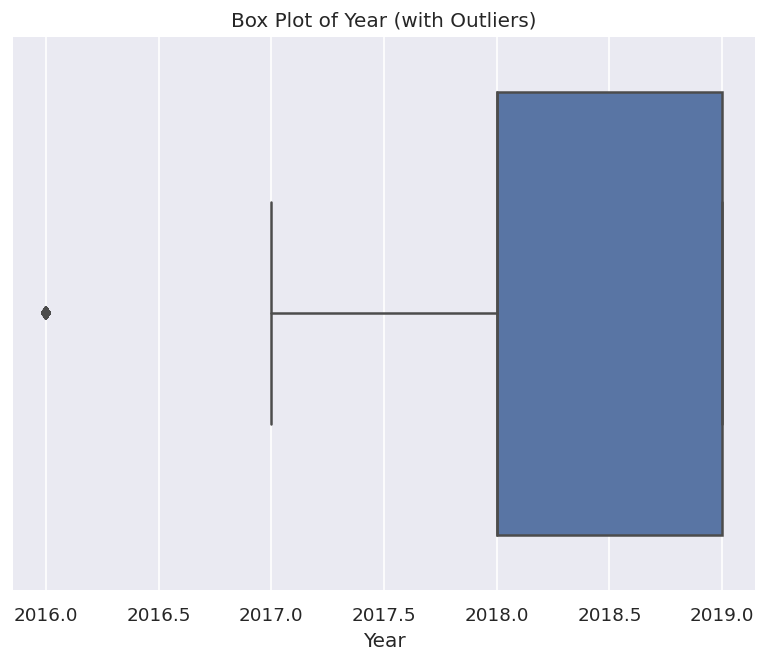

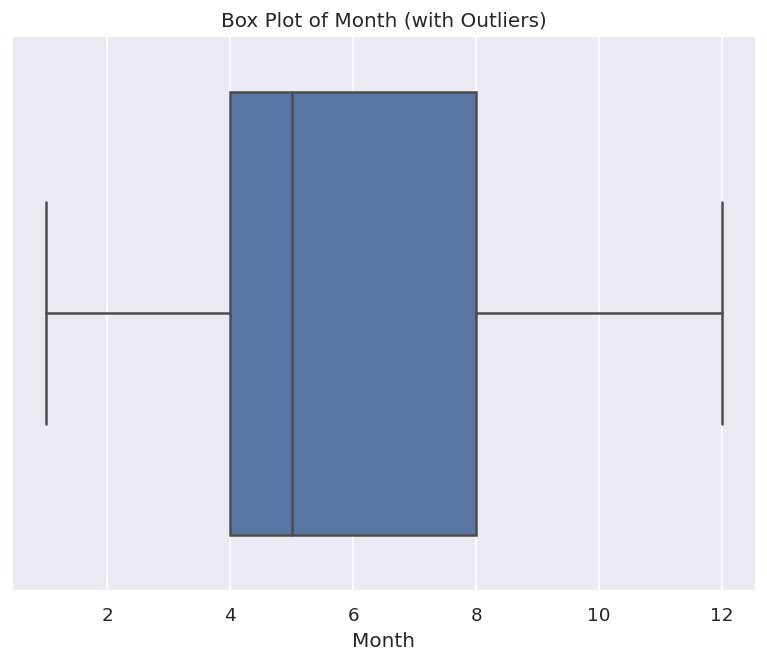

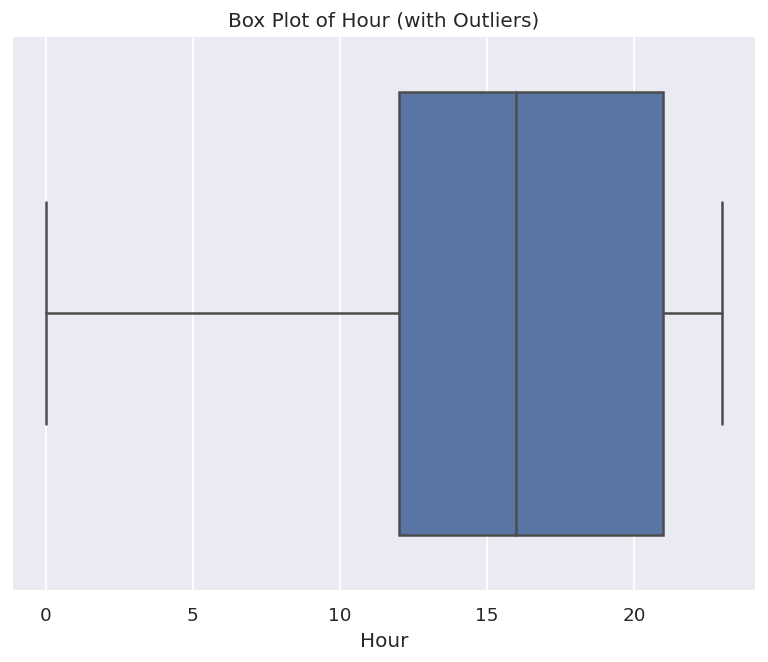

In [234]:
# Select numerical columns only (excluding non-numeric columns)
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64'])

# Loop through each numerical column and create a box plot to visualize outliers
for column in numerical_columns:
    plt.figure()
    sns.boxplot(x=merged_df[column])
    plt.xlabel(column)
    plt.title(f'Box Plot of {column} (with Outliers)')
    plt.show()


##### 1. Why did you pick the specific chart?

Boxplot is useful for displaying the distibution of a continuous variable and identifying outliers.

##### 2. What is/are the insight(s) found from the chart?

Detected outliers in 'cost', 'pictures', 'Reviewer_Total_Review', and 'Reviewer_Followers'. No outliers found in 'rating', 'year', 'month', and 'review hour'.

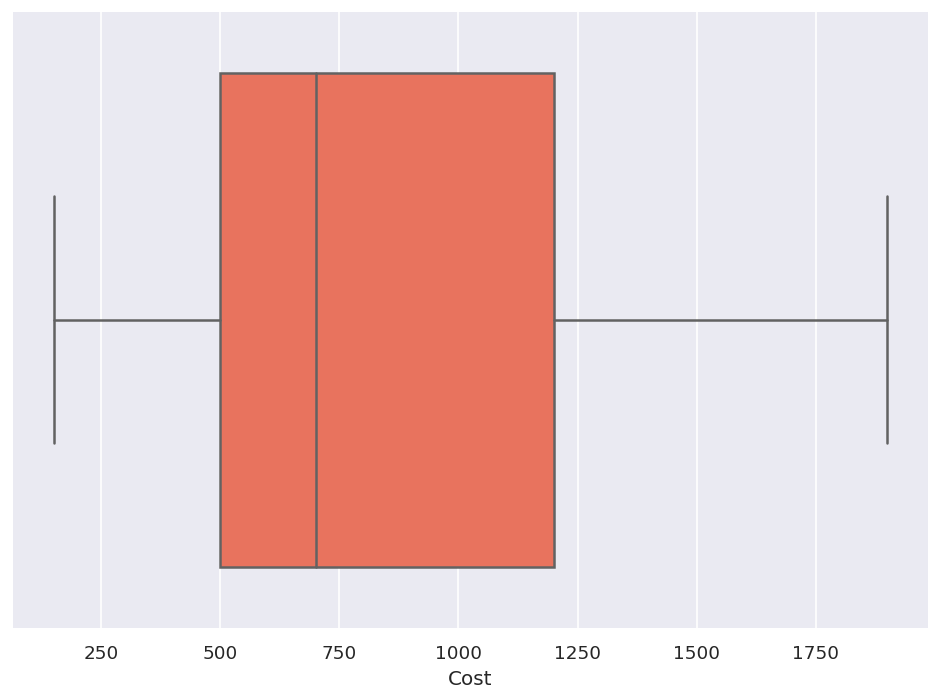

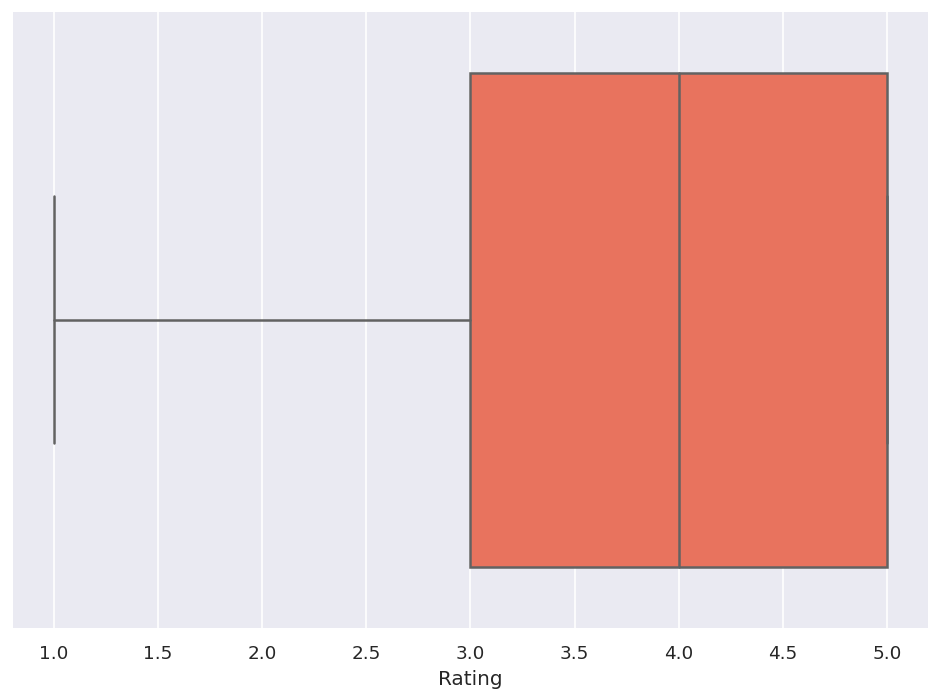

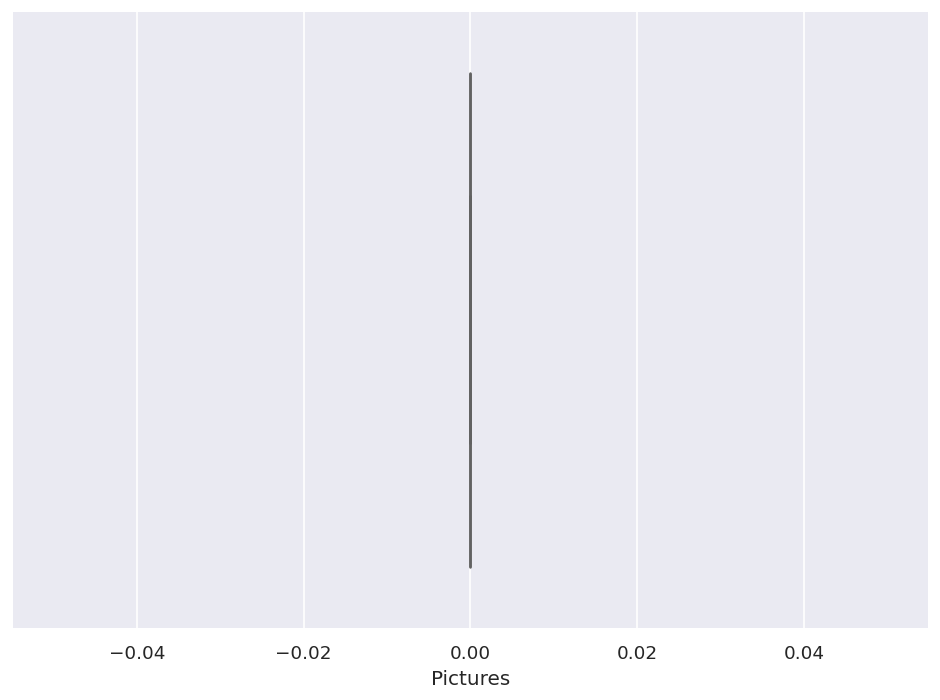

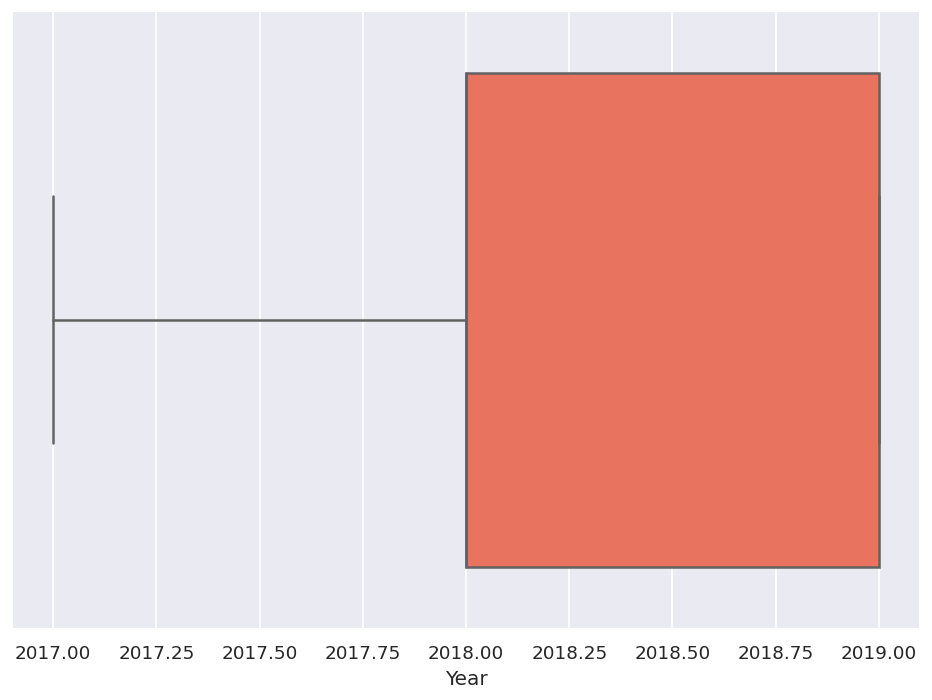

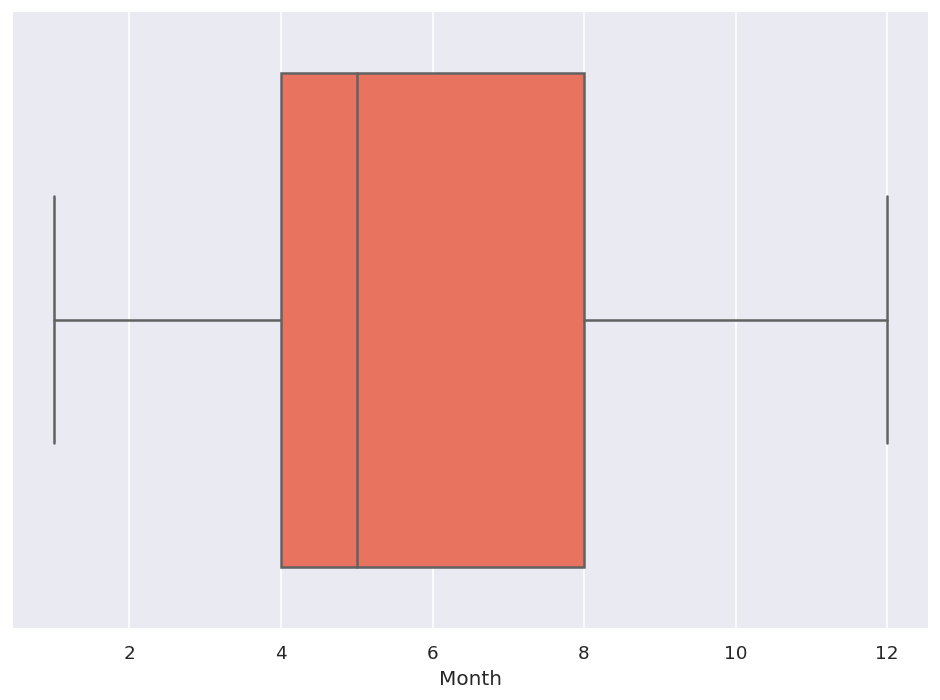

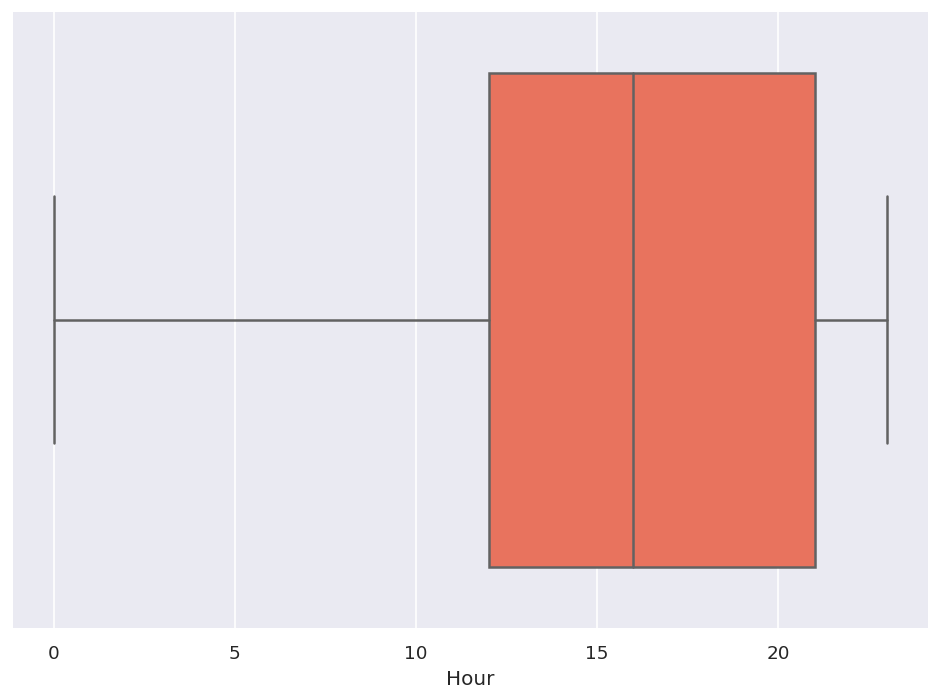

In [235]:
for i in numerical_columns:
    #plt.subplot(10, 4, 2)
    plt.xlabel('Distribution of {}'.format(i))

    # Calculate the IQR for the column
    Q1 = merged_df[i].quantile(0.25)
    Q3 = merged_df[i].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to remove outliers
    filtered_data = merged_df[(merged_df[i] >= lower_bound) & (merged_df[i] <= upper_bound)]

    # Plot the boxplot without outliers
    sns.boxplot(x=i, data=filtered_data, color="tomato")

    #c += 1

    plt.tight_layout()
    plt.show()

In [236]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
df1[(df1['Cost'] >= lower_bound) & (df1['Cost'] <= upper_bound)]

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Cost Category


In [237]:
# Restricting the data to lower and upper boundary for Reviewer followers in review dataset
df2[(df2['Reviewer_Followers']>= lower_bound) & (df2['Reviewer_Followers'] <= upper_bound)]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Year,Month,Day,Hour,Reviewer_Total_Review,Reviewer_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0.0,2019.0,5.0,Saturday,15.0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0.0,2019.0,5.0,Saturday,14.0,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0.0,2019.0,5.0,Friday,22.0,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0.0,2019.0,5.0,Friday,22.0,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0.0,2019.0,5.0,Friday,21.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,Chinese Pavilion,Suhas Bhatt,Good ambience and presentation. Thai flavor is...,4.0,"2 Reviews , 1 Follower",2017-03-26 21:53:00,0.0,2017.0,3.0,Sunday,21.0,2,1
9972,Chinese Pavilion,Suvashri Dey,"Liked the food, the Tom yum soup was okay. The...",4.0,"14 Reviews , 5 Followers",2017-01-09 12:47:00,0.0,2017.0,1.0,Monday,12.0,14,5
9979,Chinese Pavilion,Ankush Agrawal,The place has authentic Chinese food. We had s...,4.0,"12 Reviews , 17 Followers",2016-11-04 19:58:00,0.0,2016.0,11.0,Friday,19.0,12,17
9992,Chinese Pavilion,Sujay Garg,I visited this restaurant with friends and was...,5.0,"4 Reviews , 1 Follower",2016-06-15 00:04:00,0.0,2016.0,6.0,Wednesday,0.0,4,1


##### What all outlier treatment techniques have you used and why did you use those techniques?

The Interquartile Range (IQR) is a statistical measure representing the range of the middle 50% of the data. It summarizes data spread and is useful for handling outliers.

### 3. Categorical Encoding

In [238]:
# Encode your categorical columns

# getting only necessary features for Clustering
cluster_df = pd.merge(df1, price_point, how='right',
                      on='Restaurant')[['Restaurant', 'Cost', 'Rating', 'Cuisines']]

# Encoding the Cuisines as columns to further use in clustering

#splitting cuisines into a list
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x: x.split(', '))

# adding the number of cuisines another feature
cluster_df['no_of_cuisines'] = cluster_df['Cuisines'].apply(lambda x: len(x))


# Create a list of all unique cuisines
all_cuisines = list(set([cuisine for cuisines in cluster_df['Cuisines'] for cuisine in cuisines]))

# Create a DataFrame with a column for each unique cuisine
cuisine_df = pd.DataFrame(columns=all_cuisines)

# Loop over each restaurant and create a feature vector
for i, row in cluster_df.iterrows():
    feature_vec = {cuisine: 0 for cuisine in all_cuisines}
    for cuisine in row['Cuisines']:
        feature_vec[cuisine] += 1
    cuisine_df.loc[i] = feature_vec

# Concatenate the original DataFrame with the cuisine DataFrame
cluster_df = pd.concat([cluster_df, cuisine_df], axis=1)

In [239]:
# Let's make copy of cluster datafram
cluster_org_df = cluster_df.copy()

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used a technique similar to One Hot Encoding to represent cuisines as features with their counts for each restaurant. This enabled unsupervised clustering analysis.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [240]:
# Expand Contraction
!pip install contractions


In [241]:
#creating new df for text processing of sentiment analysis
sentiment_df = df2[['Reviewer','Restaurant','Rating','Review']]
#analysing two random sample
sentiment_df.sample(2)

,Reviewer,Restaurant,Rating,Review
3131,Rakshitha Meghna D,Pista House,4.0,A very small place with a lot of varieties.\nW...
8492,Jagannath Rao Bandari,T Grill,4.5,"Good food, value for money. We need not wait f..."


In [242]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

#### 1. Lower Casing

In [243]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()
# random observation
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
7464,7464,Harikiran Gupta,Faasos,3.0,*zomato food review program\ni have ordered fo...
1736,1736,Saloni Gupta🧁,Hotel Zara Hi-Fi,1.0,i am wondering how this restaurant has a 3.5 r...


#### 2. Removing Punctuations

In [244]:
import string

def remove_punctuation(text):
    '''Removes punctuation marks from the given text.

    Parameters:
    text (str): The text from which punctuation marks will be removed.

    Returns:
    str: The text stripped of punctuation marks.
    '''
    # Check if the input is NaN or None
    if isinstance(text, str):
        # Create a translator to remove punctuation marks
        translator = str.maketrans('', '', string.punctuation)
        # Return the text stripped of punctuation marks
        return text.translate(translator)
    else:
        return text


In [245]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
7337,7337,Srikanth P,Driven Cafe,1.0,ordered tea but received milk
1851,1851,Roshan Jha,10 Downing Street,4.0,if you are in hyderabad and its weekend this p...


#### 3. Removing URLs & Removing words and digits contain digits.

In [246]:
import re

def remove_non_letters(text):
    '''Removes all non-letters from the given text.

    Parameters:
    text (str): The text from which non-letters will be removed.

    Returns:
    str: The text stripped of non-letters.
    '''
    # Use regex to remove all non-letter characters from the text
    return re.sub(r'[^a-zA-Z]', ' ', text)

# Replace NaN values in the 'Review' column with an empty string
sentiment_df['Review'] = sentiment_df['Review'].fillna('').apply(remove_non_letters)


In [247]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
df1['Location'] = df1['Links'].apply(get_location)
df1.sample(2)

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Cost Category,Location
72,Labonel,https://www.zomato.com/hyderabad/labonel-gachi...,1000,Best Bakeries,"Bakery, Desserts","11 AM to 8 PM (Mon-Sat), Sun Closed",medium,hyderabad
57,Being Hungry,https://www.zomato.com/hyderabad/being-hungry-...,450,NaN,"North Indian, Chinese","12 Noon to 3 PM, 7 PM to 11:30 PM",low,hyderabad


#### 5. Removing Stopwords & Removing White spaces

In [248]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [249]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [250]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [251]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [252]:
# random sample
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
3858,3858,Vineet,The Glass Onion,5.0,super food fantastic service vishal extremely ...
5020,5020,Manasi Puranik,Gal Punjab Di,1.0,ordered butter chicken paneer makhani dal makh...


#### 7. Tokenization

In [253]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

#### 7. Text Normalization

In [254]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
3004,3004,Saikrishna Javvaji,Pot Pourri,4.0,"[went, alacarte, heard, lot, previously, went,..."
9762,9762,Ankita Trivedi,Triptify,1.0,"[whole, order, wrong, moreover, received, burn..."


##### Which text normalization technique have you used and why?

1. Lemmatization reduces words to their base form, considering context and grammar.
2. It uses a dictionary-based approach for accurate results.
3. Unlike stemming, it preserves context and grammatical correctness.
4. Useful in NLP tasks for consistent and meaningful representations.

#### 10. Text Vectorization

In [255]:
# Vectorizing Text

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

#### Which text vectorization technique have you used and why?

I have used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [256]:
#columns for dataset
df1.columns

Index(['Restaurant', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Cost Category', 'Location'],
      dtype='object')

In [257]:
#dropping columns
df1 = df1.drop(columns = ['Links','Location'], axis = 1)

In [258]:
#dropping cuisine and restaurant from cluster_df
cluster_df = cluster_df.drop(columns = ['Restaurant','Cuisines'], axis = 1)

In [259]:
#review column
df2.shape

(9955, 13)

In [260]:
#For sentiment analysis
# Create a new column for sentiment based on the ratings
def classify_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating >= 3:
        return 'Neutral'
    else:
        return 'Negative'

sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(classify_sentiment)

#### 2. Feature Selection

In [261]:
# First look of Sentiment Dataframe.
sentiment_df.head()

,index,Reviewer,Restaurant,Rating,Review,Sentiment
0,0,Rusha Chakraborty,Beyond Flavours,5.0,"[ambience, good, food, quite, good, saturday, ...",Positive
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.0,"[ambience, good, pleasant, evening, service, p...",Positive
2,2,Ashok Shekhawat,Beyond Flavours,5.0,"[must, try, great, food, great, ambience, thnx...",Positive
3,3,Swapnil Sarkar,Beyond Flavours,5.0,"[soumen, da, arun, great, guy, behavior, since...",Positive
4,4,Dileep,Beyond Flavours,5.0,"[food, goodwe, ordered, kodi, drumstick, baske...",Positive


In [262]:
# Select your features wisely to avoid overfitting

# From analysis df, keeping only required features for final input
sentiment_df = sentiment_df[['Restaurant', 'Review', 'Rating', 'Sentiment']]

##### What all feature selection methods have you used  and why?

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

We will use Principal Component Analysis (PCA) for feature selection in Clustering problems to address the dimensionality problem with features. PCA will reduce the number of features while retaining the most important information.

#### Which all features you found important and why?

For Restaurant Clustering, we found that 'Cuisines', 'Cost', and 'Rating' were important features in performing the clustering analysis. Additionally, for Topic Modeling from Reviews data, we selected the text data and converted it to TF-IDF vectors.

### 5. Data Transformation

In [263]:
# Transform Your data

cluster_df['Cost'] = np.log(cluster_df['Cost']) # tranfomed Cost

Feature transformation, like log transforming right-skewed data, enhances machine learning model performance and interpretability, especially for skewed or non-normal data. Other numerical features exhibit symmetric data distribution.

### 6. Data Scaling

In [264]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Select the numerical variables to standardize
numerical_vars = ['Cost', 'Rating', 'no_of_cuisines']

# Standardize the numerical variables using StandardScaler
scaler = StandardScaler()
cluster_df[numerical_vars] = scaler.fit_transform(cluster_df[numerical_vars])

##### Which method have you used to scale you data and why?

1. Used Standard Scaler to address varying scales and ranges of numerical variables.
2. Different scales can impact clustering results; e.g., a meal cost may overshadow a rating.
3. Standardization ensures equal contribution of each variable to the clustering process.
4. Results become more reliable and interpretable when variables are on the same scale.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

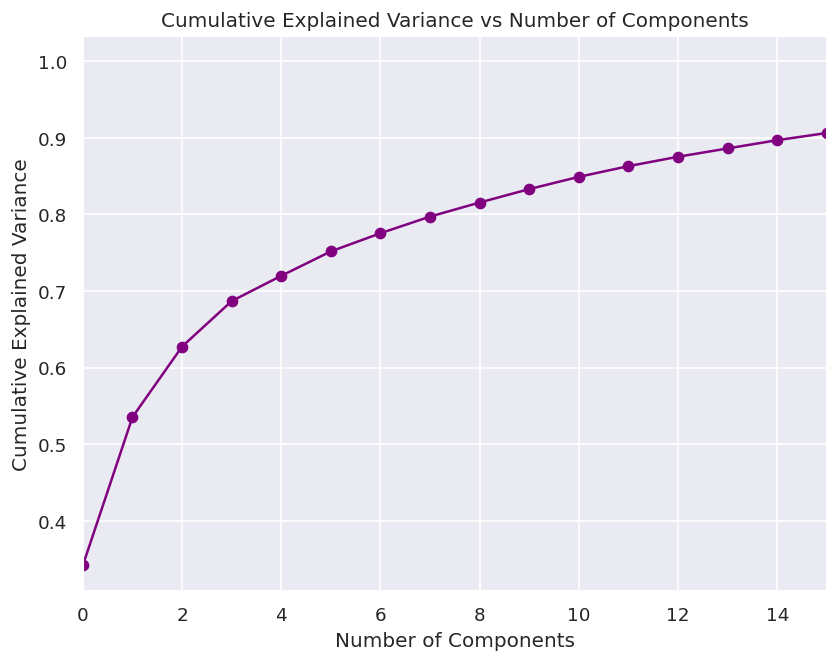

In [265]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

pca = PCA()

# Fit the PCA object to your standardized data
pca.fit(cluster_df)

# Get explained variance ratio of each principal component
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# visualising the cummulative variance
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(cumulative_var, marker='o', color='purple')
ax.set_xlabel("Number of Components")
ax.set_ylabel("Cumulative Explained Variance")
ax.set_title("Cumulative Explained Variance vs Number of Components")
plt.xlim([0, 15])


plt.show()


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

1. Dimensionality reduction reduces the number of features in a dataset while retaining relevant information.
2. Overcoming the curse of dimensionality improves computational efficiency and model performance.
3. Countvectorization technique generates numerous features for clustering.
4. Handling a large number of features affects performance and resource usage.
5. Dimensionality reduction is essential to manage computational complexity and enhance efficiency in data analysis.

In [266]:
#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(cluster_df)

# transform data to principal component space
pca_df = pca.transform(cluster_df)

# variance explained by three components
print(f'Cumulative variance explained by 3 principal components: {np.sum(pca.explained_variance_ratio_)}')

Cumulative variance explained by 3 principal components: 0.6274023763527633


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

#### I have used Principal Component Analysis technique.
1. PCA is commonly used for dimensionality reduction in unsupervised learning.
2. Suitable for datasets with more than 40 features to simplify visualization and analysis.
3. Reduces dimensionality by transforming original features into orthogonal principal components.
4. Principal components are ordered by variance explained in the data.
5. Helps retain most of the variation while reducing the complexity of the dataset.

### 8. Data Splitting

In [267]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

In unsupervised learning, the goal is to find patterns in the data without any known outcome. Therefore, there is no need to split the dataset into a training set and a test set. The entire dataset can be used to train the unsupervised learning algorithm.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

In unsupervised learning, there is no target variable, so there is no concept of imbalance. The goal of unsupervised learning is to find patterns in the data without any reference to a known outcome. Therefore, imbalance is not a problem in unsupervised learning.

## ***7. ML Model Implementation***

### ML Model - 1

In [268]:
# importing kmeans
from sklearn.cluster import KMeans

#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(pca_df)
    wcss.append(km.inertia_)

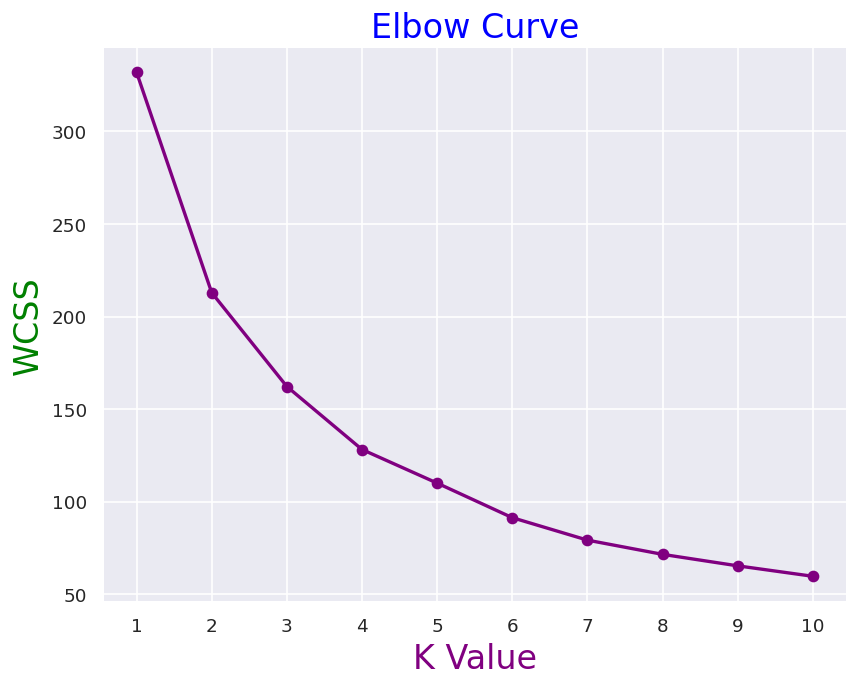

In [269]:
# Let's generate an Elbow Curve to visualize the relationship between the number of clusters (K) and the WCSS
plt.plot(range(1, 11), wcss, color='purple', marker='o', linestyle='-', linewidth=2)
plt.xlabel("K Value", size=20, color='purple')
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS", size=20, color='green')
plt.title('Elbow Curve', size=20, color='blue')
plt.show()


In this code:

1. The "Within-Cluster Sum of Squares" (WCSS) values for different values of K (number of clusters) are plotted.
2. The WCSS is calculated for K values ranging from 1 to 10.
3. The plot displays the WCSS values on the y-axis and the corresponding K values on the x-axis.
4. The plot represents an "Elbow Curve," which helps to identify the optimal number of clusters based on the "elbow point" where the curve starts to flatten.
5. The x-axis is labeled as "K Value," and the y-axis is labeled as "WCSS." The plot is styled with colors for better visualization.

For n_clusters = 2 average silhouette_score is : 0.3129359282231549
For n_clusters = 3 average silhouette_score is : 0.2965358373420004
For n_clusters = 4 average silhouette_score is : 0.3112986431972677
For n_clusters = 5 average silhouette_score is : 0.30285047506845164
For n_clusters = 6 average silhouette_score is : 0.316617500010228
For n_clusters = 7 average silhouette_score is : 0.3215240058680506
For n_clusters = 8 average silhouette_score is : 0.29943737802069303
For n_clusters = 9 average silhouette_score is : 0.30284787214358905


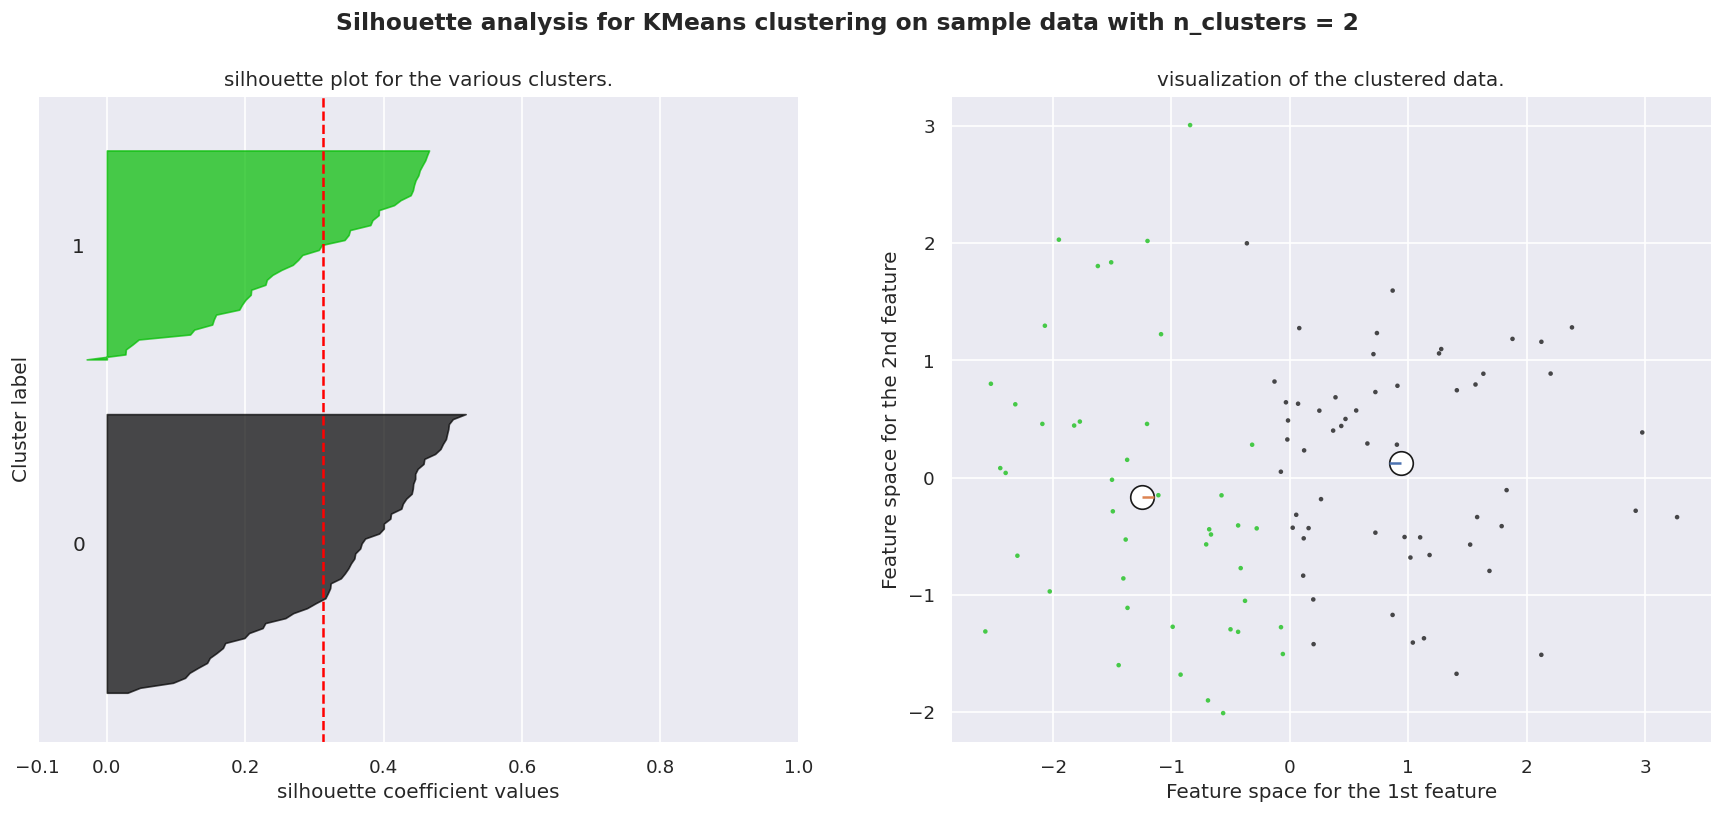

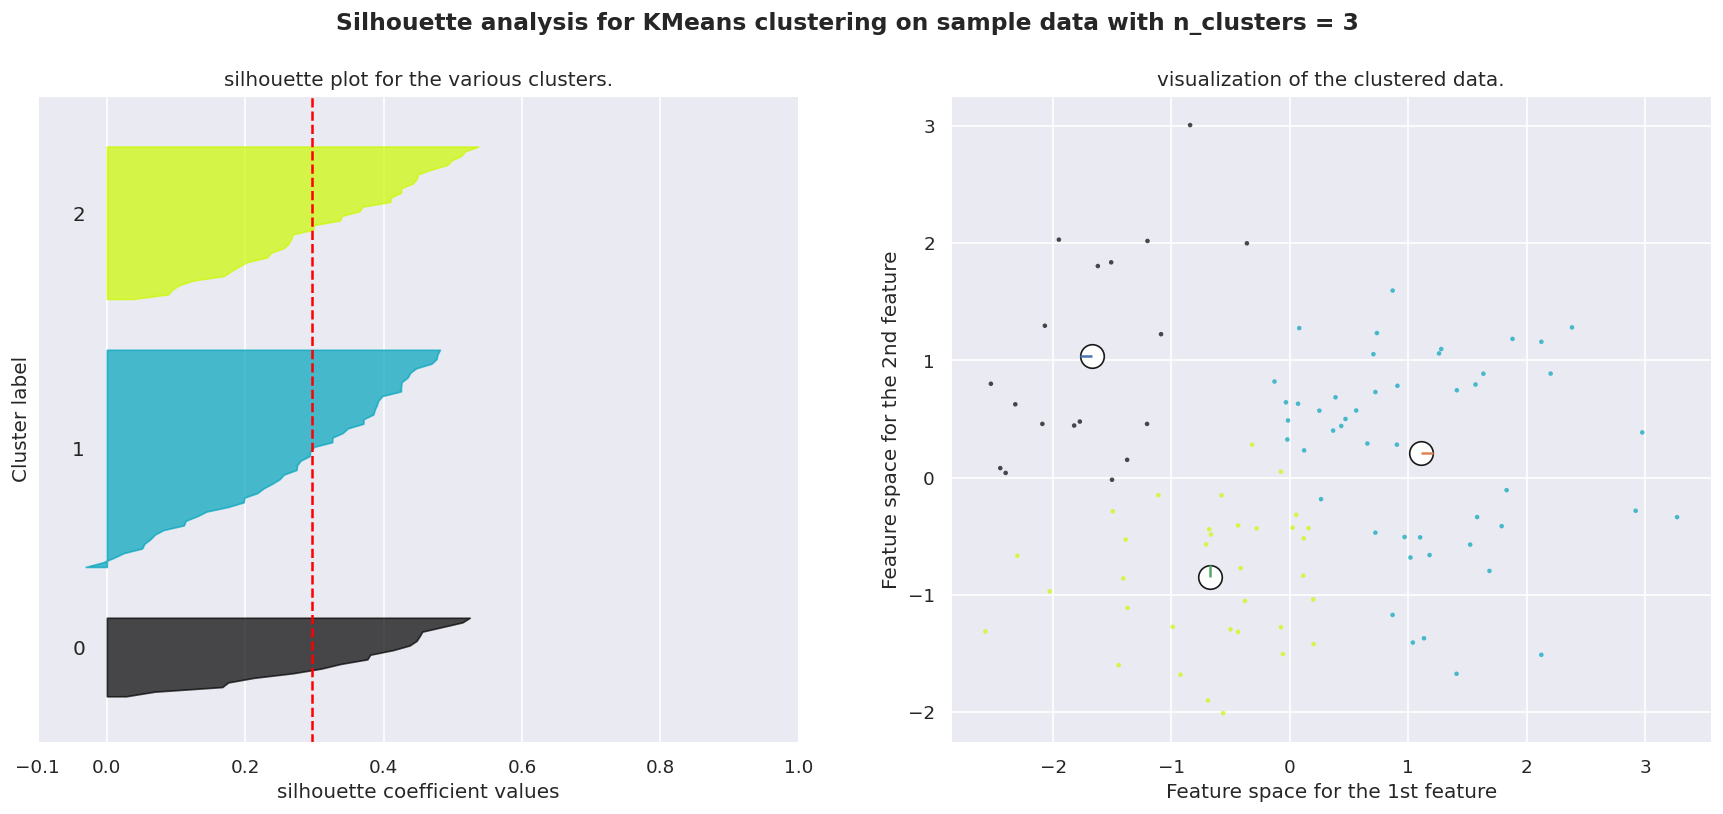

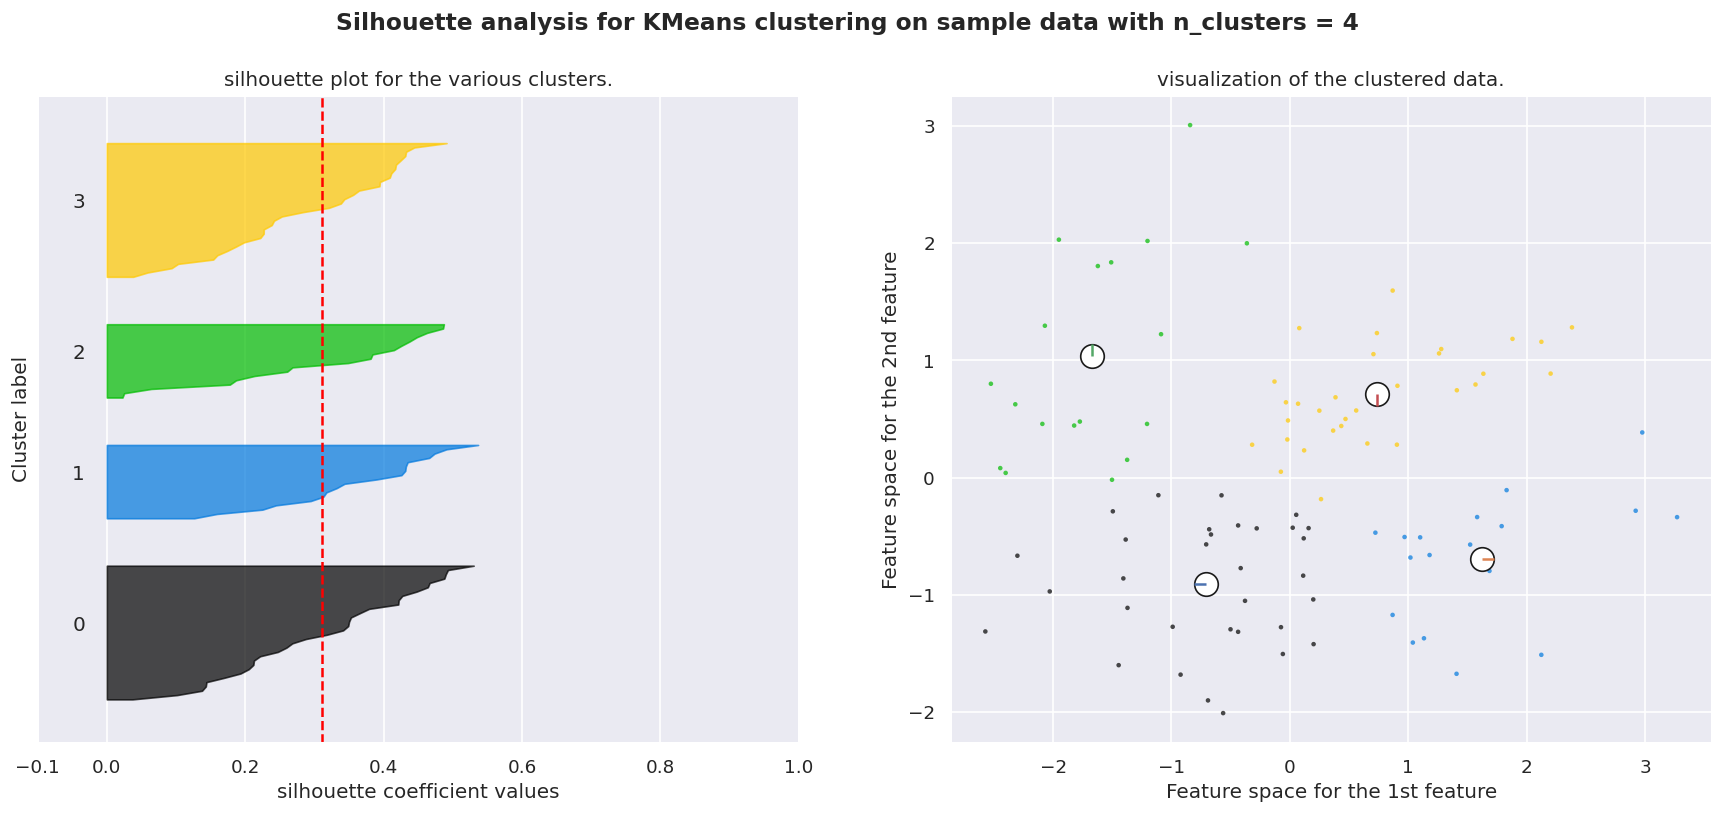

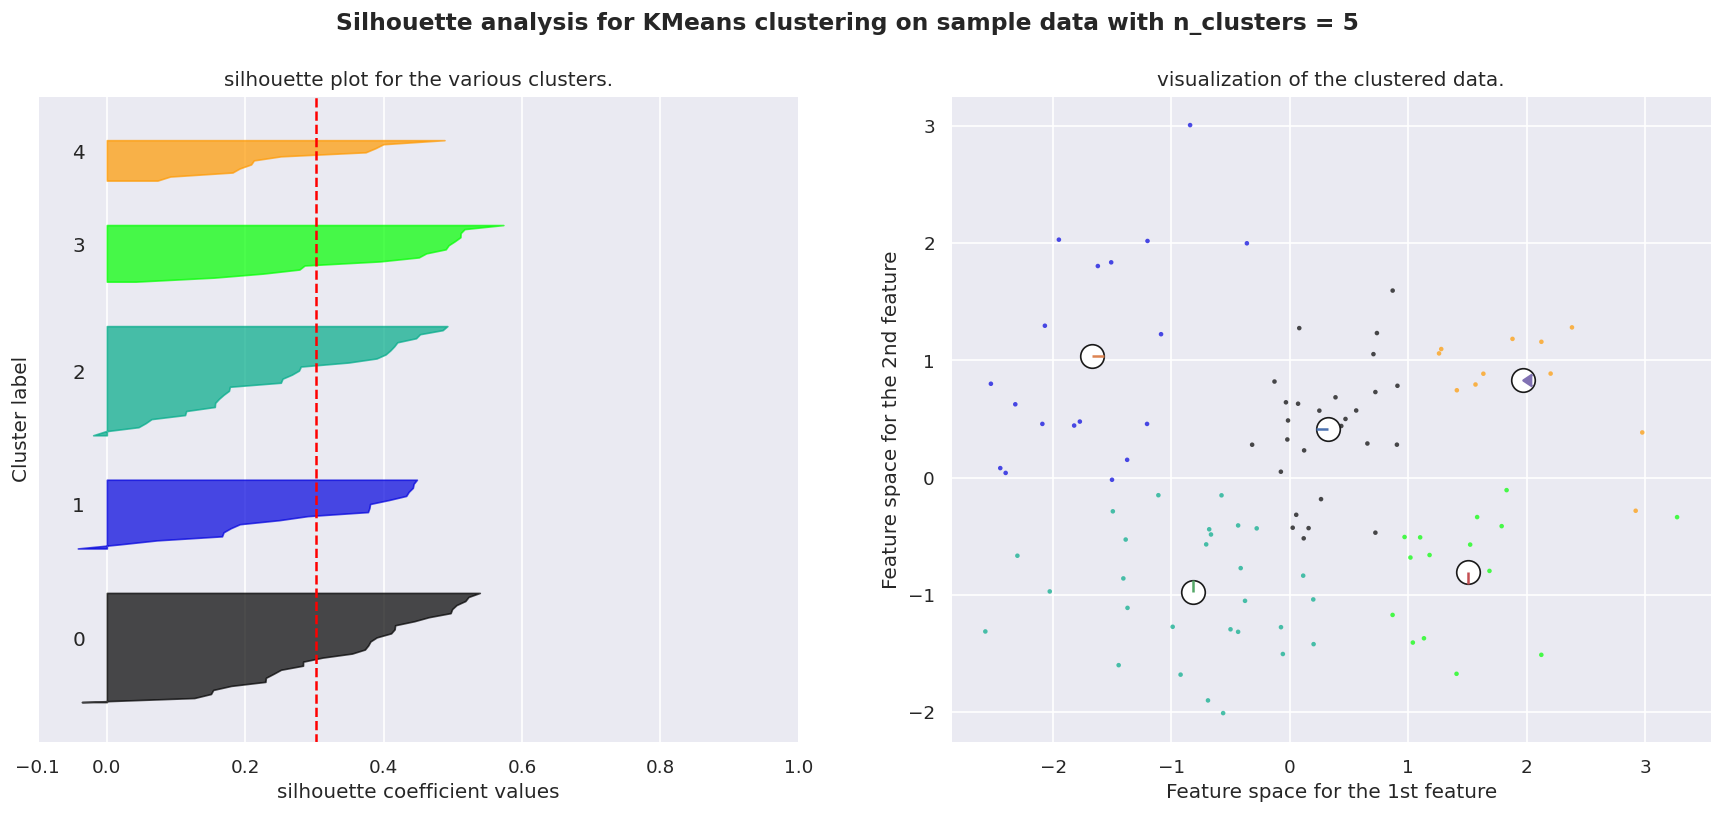

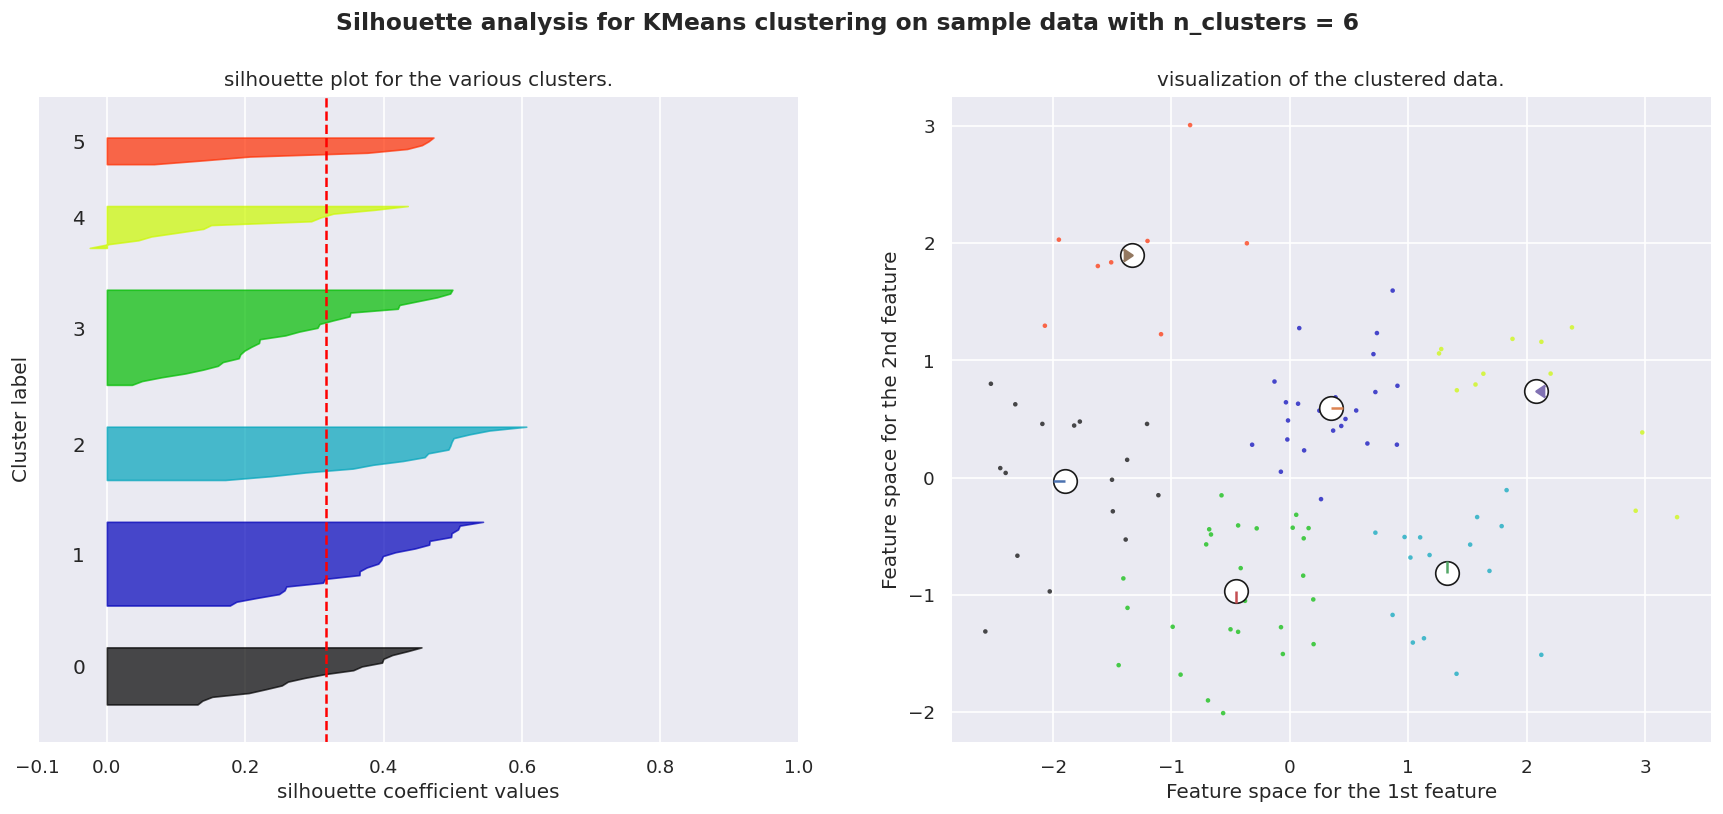

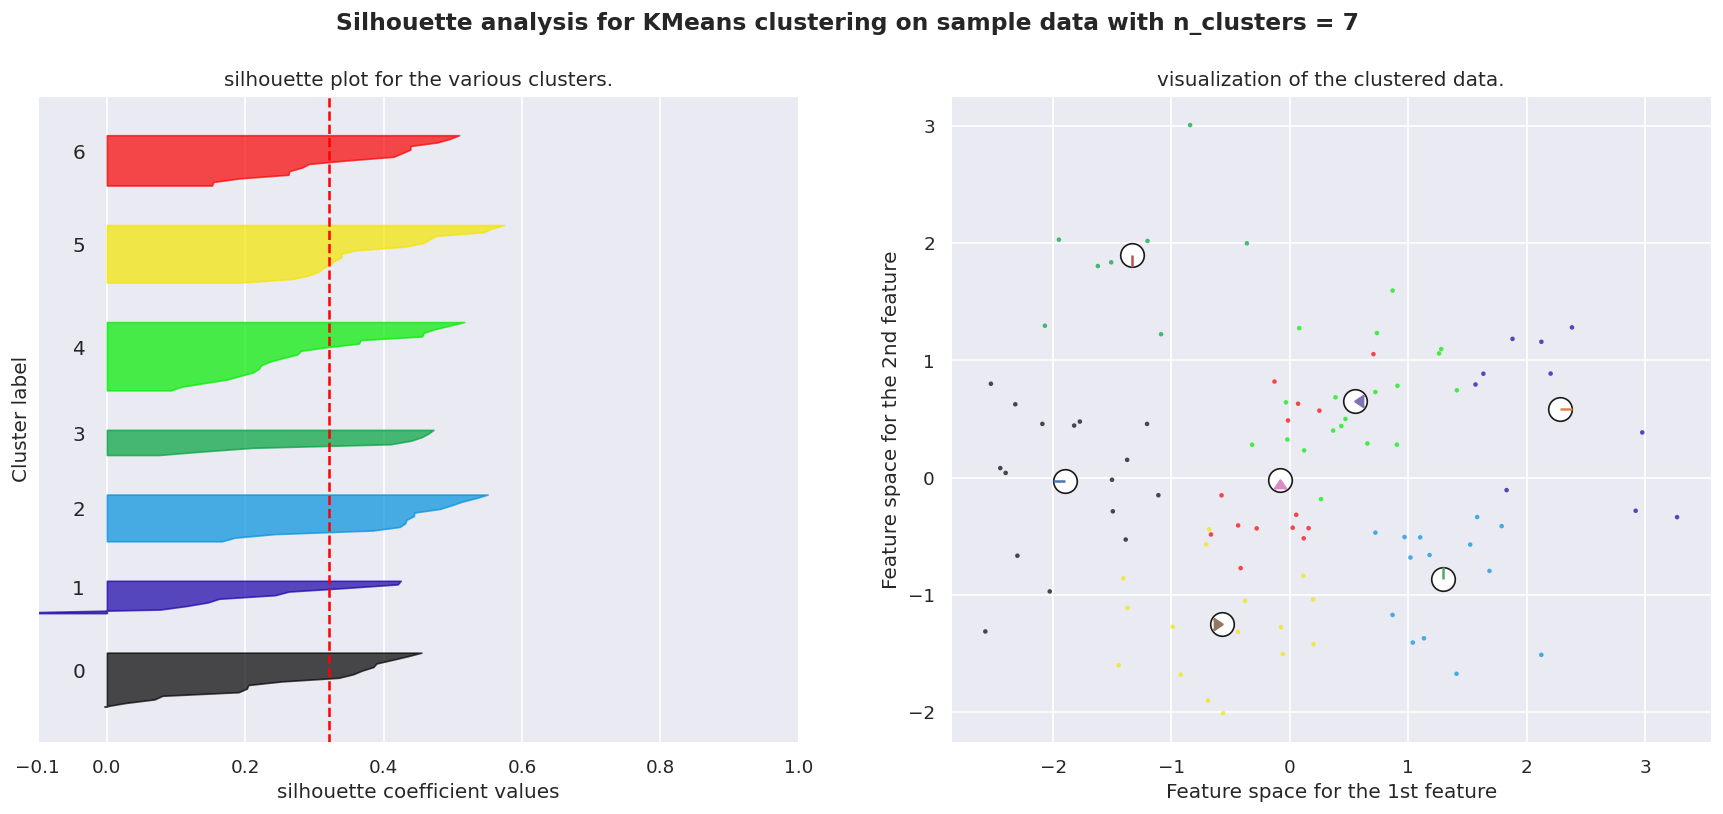

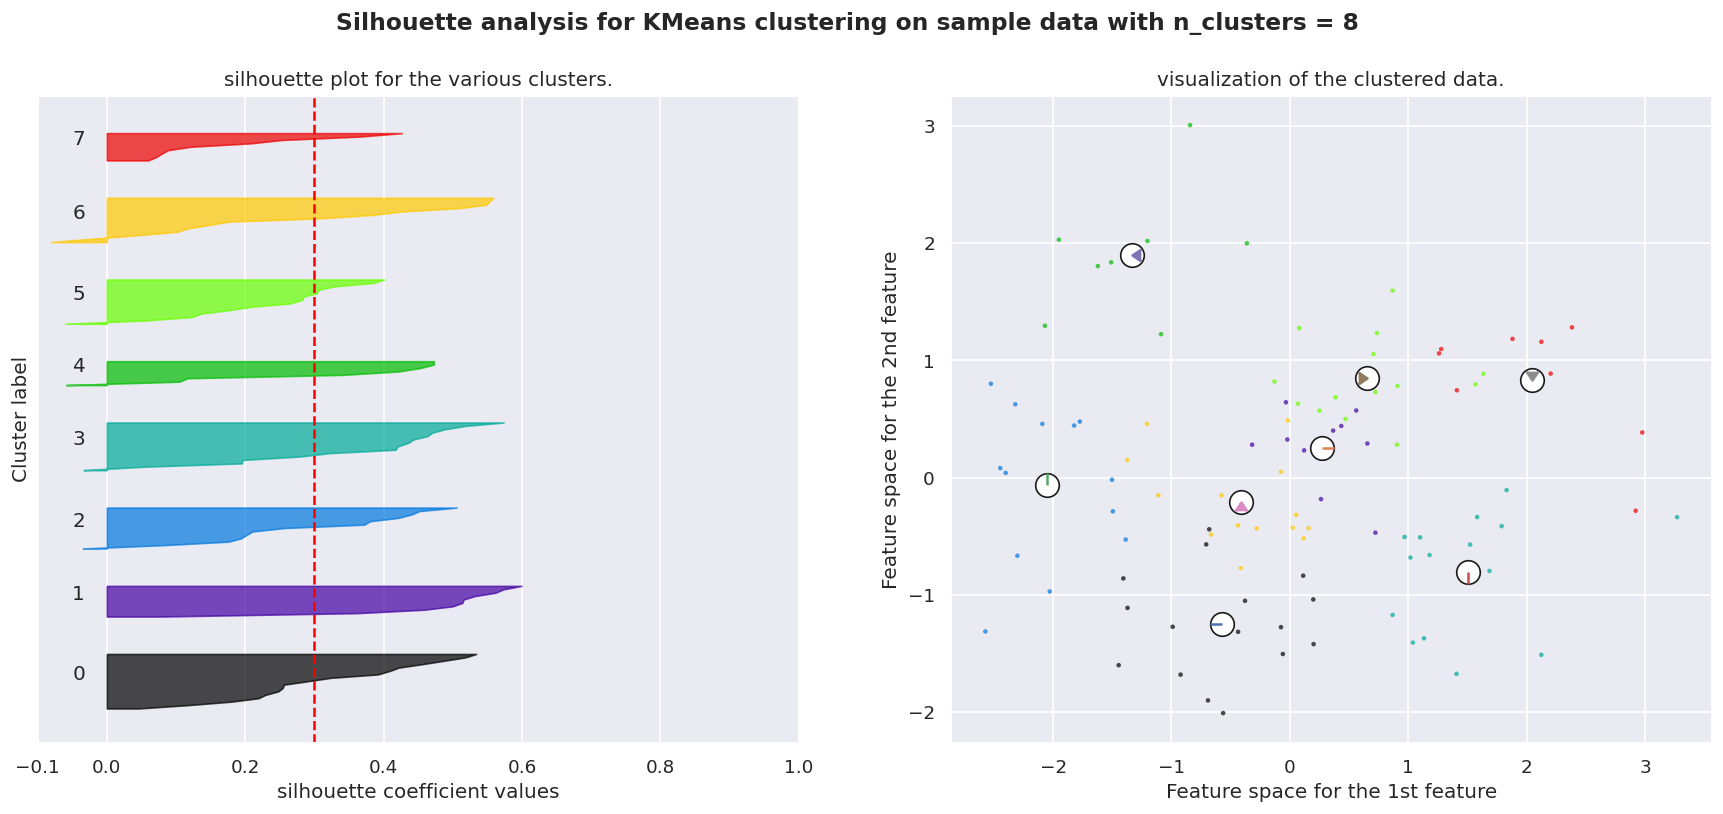

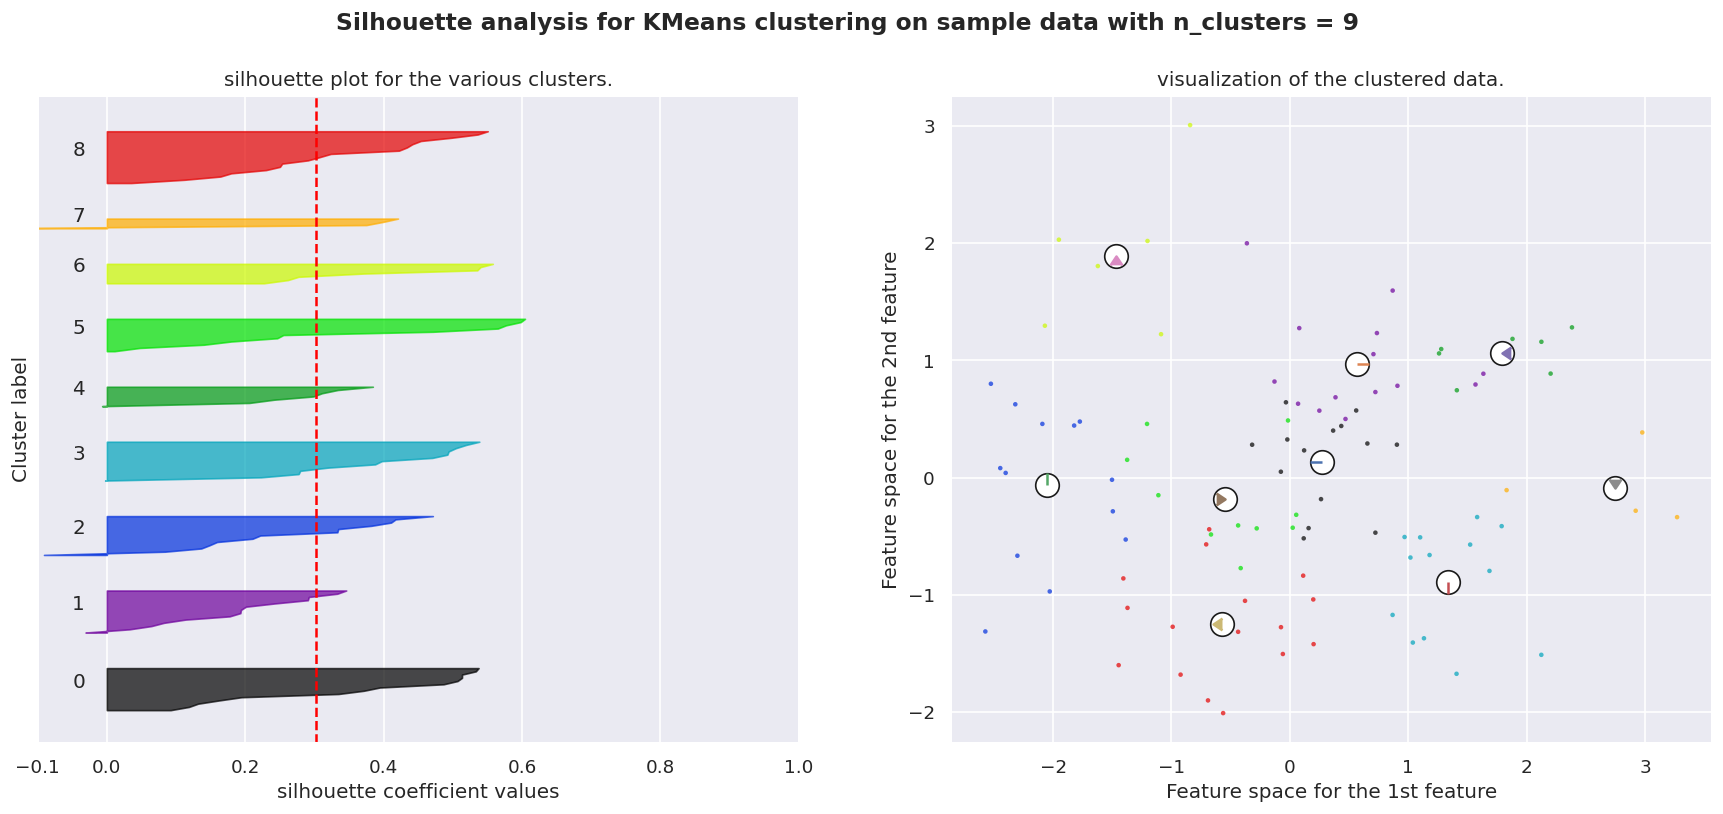

In [270]:
# silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_df)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_df, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_df[:, 0], pca_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- K-means is a common clustering algorithm in machine learning that groups data based on similarities.
- It was applied to a restaurant dataset with cuisine, ratings, and cost to create clusters.
- Silhouette score is used to evaluate clustering quality, ranging from -1 to 1.
- The score of approximately 0.31 suggests somewhat distinct clusters.

To interpret the silhouette visualizer graph:

1. Look for a high average silhouette score, indicating well-separated and well-matched clusters.
2. Seek even cluster sizes, represented by bars of similar width.
3. Avoid overlapping bars, indicating suboptimal clustering.
4. Ensure there are no negative silhouette scores.

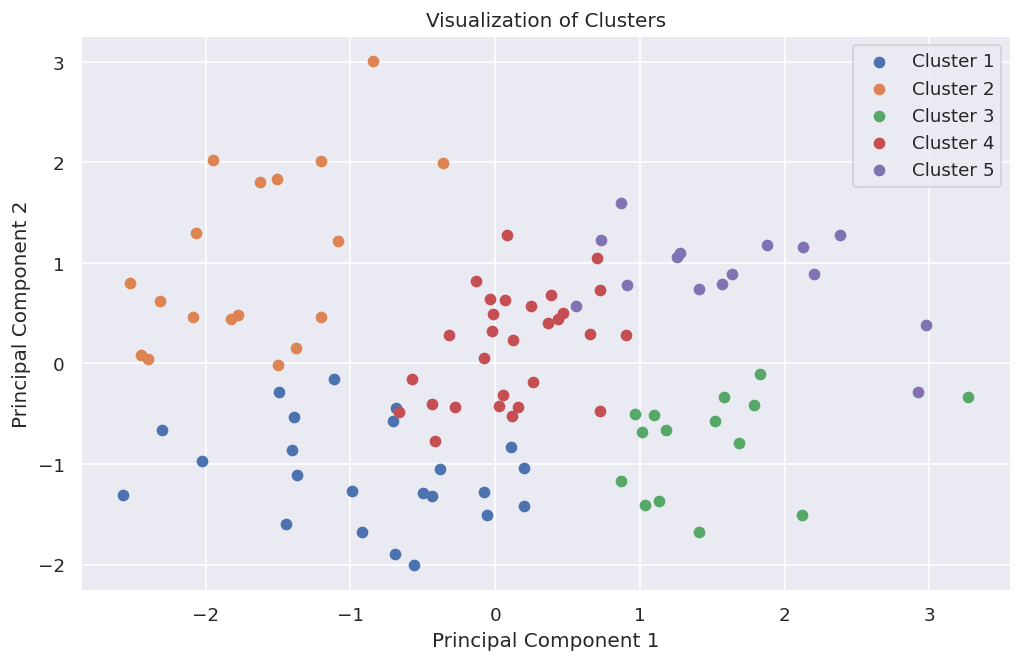

In [271]:
# Let's creates a scatter plot to visualize the clustering result
plt.figure(figsize=(10, 6), dpi=120)

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
label = kmeans.fit_predict(pca_df)

# Getting unique labels
unique_labels = np.unique(label)

# Plotting the results
for i in unique_labels:
    plt.scatter(pca_df[label == i, 0], pca_df[label == i, 1], label=f'Cluster {i+1}')

plt.title('Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


- K-means and hierarchical clustering are methods to group data into clusters.
- K-means uses centroids and means of data points, while hierarchical clustering uses similarity between data points.
- Different criteria can cause different cluster labels for data points.
- The number of clusters and initialization also affect the outcome.

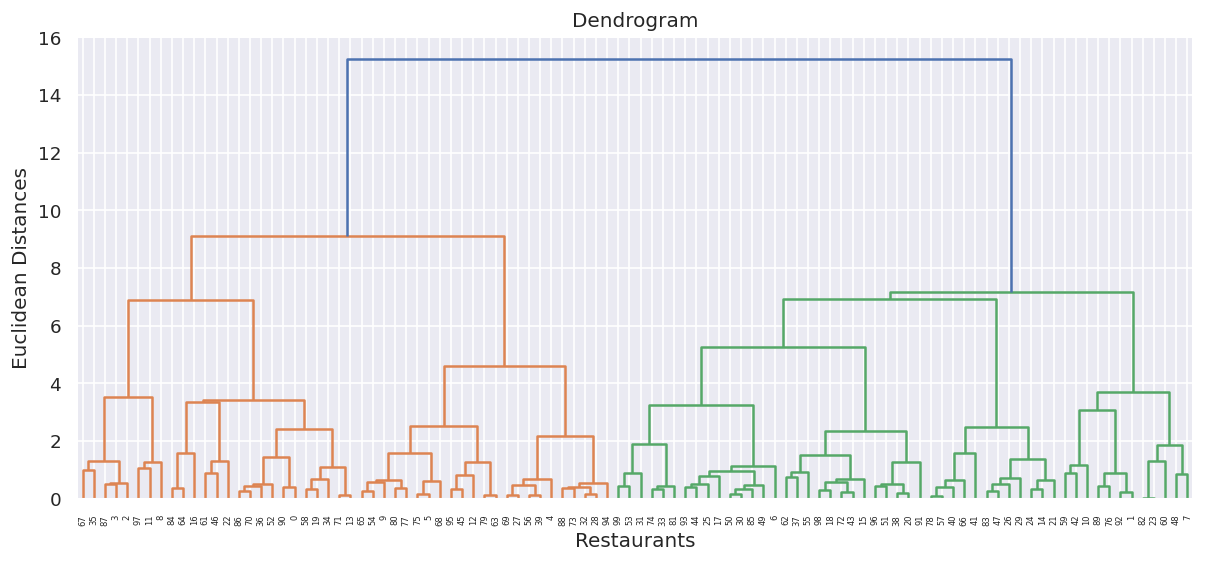

In [272]:
# Let's generated Dendrogram using hierarchical clustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(pca_df, method='ward'), orientation='top', labels=None,
                           distance_sort='descending', show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')
plt.show()


The dendrogram visually represents the distances (Euclidean) between restaurants, helping to identify potential clusters based on similarity.

# Aglomerative Clustering

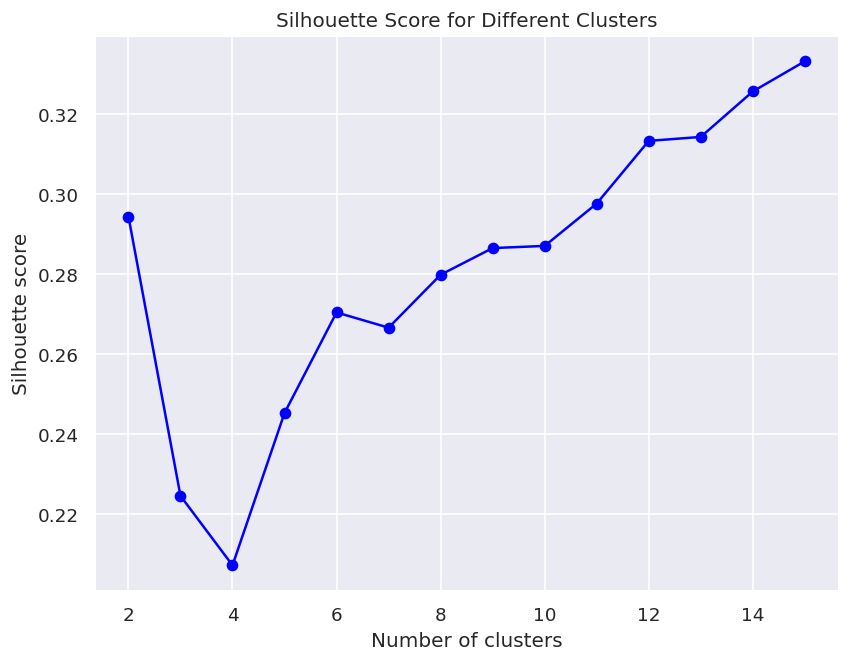

In [273]:
# Let's visual representation of how the Silhouette score changes with varying numbers of clusters.

from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    y_hc = hc.fit_predict(pca_df)
    score = silhouette_score(pca_df, y_hc)
    silhouette_scores.append(score)

# Plot the silhouette scores against the number of clusters
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for Different Clusters')
plt.show()


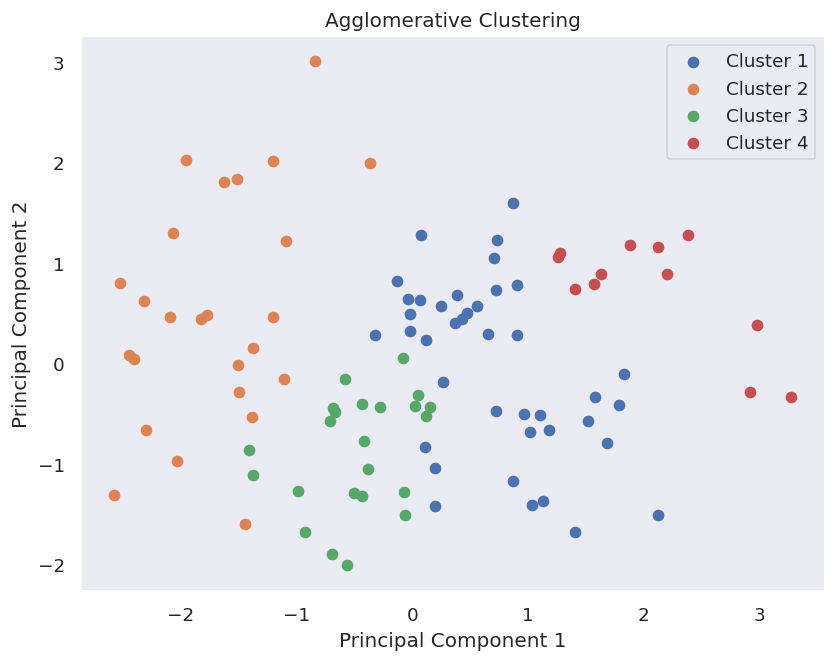

Silhouette Coefficient: 0.207
Davies Bouldin Score: 1.343


In [274]:
# Let's creates a scatter plot to visualize the clustering result.
from numpy import unique, where
from sklearn.datasets import make_classification
from sklearn.metrics import davies_bouldin_score

# Define the model
model = AgglomerativeClustering(n_clusters=4)
# Fit model and predict clusters
y_hc = model.fit_predict(pca_df)
# Retrieve unique clusters
clusters = unique(y_hc)
# Create scatter plot for samples from each cluster
for cluster in clusters:
    # Get row indexes for samples with this cluster
    row_ix = where(y_hc == cluster)
    # Create scatter of these samples
    plt.scatter(pca_df[row_ix, 0], pca_df[row_ix, 1], label=f'Cluster {cluster+1}')

# Show the plot
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(False)
plt.show()

# Evaluation
from sklearn.metrics import silhouette_score

# Silhouette Coefficient
silhouette = silhouette_score(pca_df, y_hc, metric='euclidean')
print("Silhouette Coefficient: %0.3f" % silhouette)

# Davies Bouldin score of our clusters
davies_bouldin = davies_bouldin_score(pca_df, y_hc)
print("Davies Bouldin Score: %0.3f" % davies_bouldin)


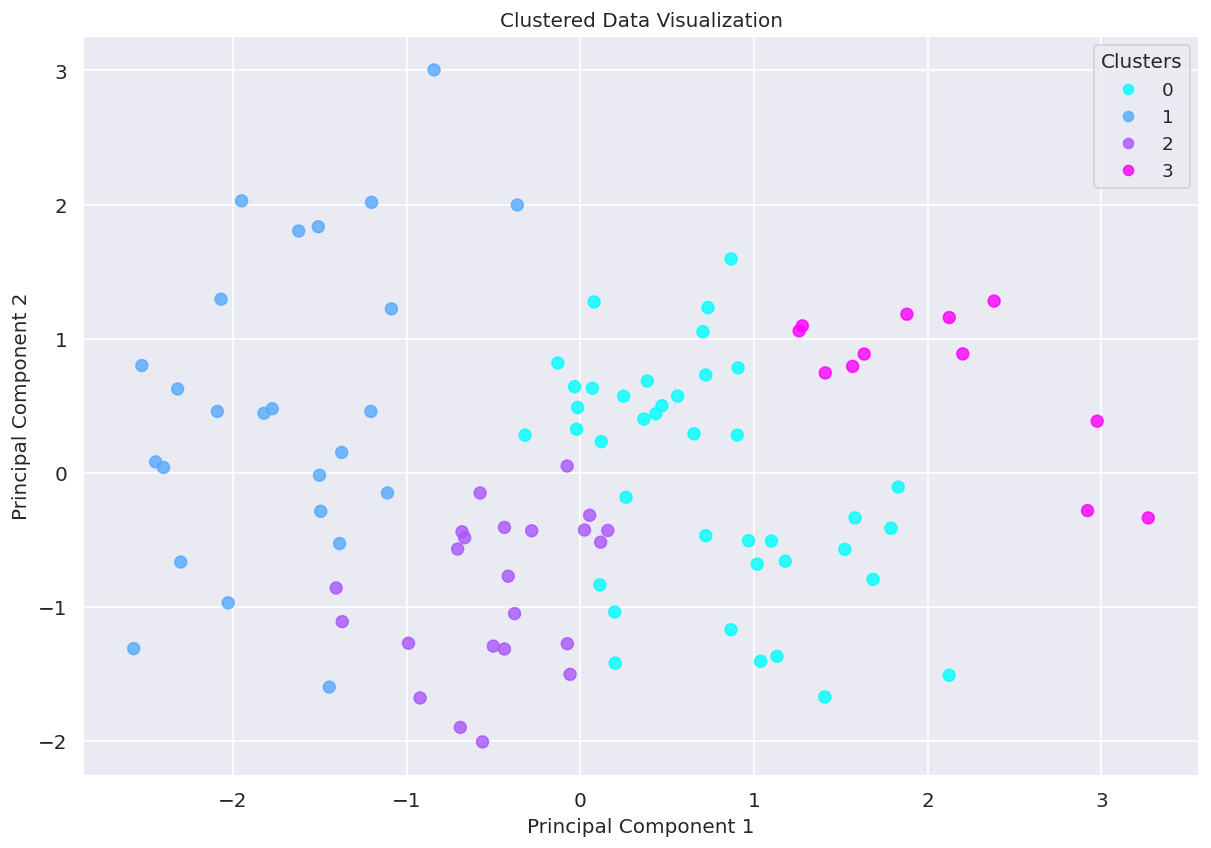

In [275]:
# Converting the PCA data matrix into a Pandas Dataframe
pca = pd.DataFrame(data=pca_df, columns=['pc1', 'pc2', 'pc3'])
pca['labels'] = y_hc

# Create scatter plot with larger and thicker data points
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x=pca['pc1'], y=pca['pc2'], c=pca['labels'], s=50, cmap='cool', alpha=0.8)
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, labels, loc='best', title='Clusters')

plt.show()


In [276]:
# adding cluster labels to the original restaurants data
cluster_org_df = cluster_org_df[['Restaurant', 'Cost', 'Rating', 'Cuisines']]
cluster_org_df['labels'] = y_hc

#Cluster 1 - Local Street/Fast Food

In [277]:
# Let's filters rows from Dataframe of cluster 1
cluster_org_df[cluster_org_df['labels']==0]

,Restaurant,Cost,Rating,Cuisines,labels
6,American Wild Wings,600,3.974026,"[American, Fast Food, Salad, Burger]",0
14,Behrouz Biryani,600,2.825000,"[Mughlai, Biryani]",0
15,Being Hungry,450,3.646465,"[North Indian, Chinese]",0
17,Biryanis And More,500,3.740000,"[North Indian, Biryani, Chinese]",0
18,Cafe Eclat,700,3.590000,"[Cafe, Bakery]",0
20,Chinese Pavilion,1000,3.745000,"[Chinese, Seafood]",0
21,Club Rogue,900,2.880000,"[North Indian, Fast Food]",0
24,Delhi-39,600,2.975000,"[North Indian, Chinese]",0
25,Deli 9 Bistro,700,3.820000,"[Cafe, Continental, Desserts]",0
26,Desi Bytes,400,2.900000,"[North Indian, Chinese]",0


#Cluster 2 - Premium Continental Restaurants

In [278]:
# Let's filters rows from Dataframe of cluster 2
cluster_org_df[cluster_org_df['labels']==1]

,Restaurant,Cost,Rating,Cuisines,labels
0,10 Downing Street,1900,3.800000,"[North Indian, Chinese, Continental]",1
2,"3B's - Buddies, Bar & Barbecue",1100,4.760000,"[North Indian, Mediterranean, European]",1
3,AB's - Absolute Barbecues,1500,4.880000,"[European, Mediterranean, North Indian]",1
8,Arena Eleven,1600,4.117647,[Continental],1
11,B-Dubs,1600,4.810000,[American],1
13,Barbeque Nation,1600,4.120000,"[Mediterranean, North Indian, Kebab, BBQ]",1
16,Beyond Flavours,800,4.280000,"[Chinese, Continental, Kebab, European, South ...",1
19,Cascade - Radisson Hyderabad Hitec City,1800,4.260000,"[North Indian, Italian, Continental, Asian]",1
22,Collage - Hyatt Hyderabad Gachibowli,2800,3.410000,"[Continental, Italian, North Indian, Chinese, ...",1
34,Feast - Sheraton Hyderabad Hotel,2500,4.220000,"[Modern Indian, Asian, Continental, Italian]",1


#Cluster 3 - International Cuisines

In [279]:
# Let's filters rows from Dataframe of cluster 3
cluster_org_df[cluster_org_df['labels']==2]

,Restaurant,Cost,Rating,Cuisines,labels
4,Absolute Sizzlers,750,3.620000,"[Continental, American, Chinese]",2
5,Al Saba Restaurant,750,3.136364,"[North Indian, Chinese, Seafood, Biryani, Hyde...",2
9,Aromas@11SIX,750,3.460000,"[North Indian, Chinese, Mughlai, Biryani]",2
12,Banana Leaf Multicuisine Restaurant,700,3.690000,"[Biryani, South Indian, North Indian, Chinese,...",2
27,Dine O China,850,3.370000,"[Chinese, Asian, Momos]",2
28,Diners Pavilion,1200,3.320000,"[Chinese, Continental, Italian]",2
32,Eat India Company,1300,3.260000,"[North Indian, Mughlai, Beverages]",2
39,Green Bawarchi Restaurant,700,3.490000,"[North Indian, Chinese, Biryani]",2
45,Hyper Local,1000,3.640000,"[American, Chinese, North Indian, Kebab, South...",2
54,La La Land - Bar & Kitchen,1000,3.190000,"[Finger Food, North Indian, Kebab, Chinese]",2


#Cluster 4 - Cafe, Ice Creams and Desserts

In [280]:
# Let's filters rows from Dataframe of cluster 4
cluster_org_df[cluster_org_df['labels']==3]

,Restaurant,Cost,Rating,Cuisines,labels
1,13 Dhaba,450,3.480000,[North Indian],3
7,Amul,150,3.929293,"[Ice Cream, Desserts]",3
10,Asian Meal Box,200,2.580000,[Asian],3
23,Cream Stone,350,3.845000,"[Ice Cream, Desserts]",3
42,Hunger Maggi Point,200,3.120000,[Fast Food],3
48,KS Bakers,200,3.965000,"[Bakery, Desserts, Fast Food]",3
59,Mohammedia Shawarma,150,2.990000,"[Street Food, Arabian]",3
60,Momos Delight,200,3.725000,[Momos],3
76,Shah Ghouse Spl Shawarma,300,3.430000,[Lebanese],3
82,Tempteys,350,3.850000,"[Desserts, Beverages]",3


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

KMeans Clustering:
1. Applied K-means clustering to group restaurants based on given features.
2. Used Elbow and Silhouette methods to determine the optimal number of clusters (n_clusters = 6).
3. Fitted the model using K-means and labeled each data point with its cluster using 'KMeans.labels_'.
4. Visualized the clusters and counted the number of restaurants in each cluster.
5. Found that the majority of restaurants belonged to the first cluster.

Agglomerative Hierarchical Clustering:
1. Used Hierarchical Clustering - Agglomerative Model to cluster restaurants based on different features.
2. Employed Silhouette Coefficient Score and used clusters = 4 for the model.
3. Visualized the clusters and the data points within them.

#Topic Modeling

Latent Dirchallent Allocation(LDA)

In [281]:
# Importing Library for LDA
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

In [282]:
# Convert 'Review' column to strings
df2['Review'] = df2['Review'].astype(str)

# Tokenize the documents
tokenized_docs = [simple_preprocess(doc) for doc in df2['Review']]

# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_docs)

# Convert the tokenized documents to a bag-of-words corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Train an LDA model on the bag-of-words corpus
num_topics = 10  # The number of topics to extract
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics and their top 10 terms
for topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    print('Topic {}: {}'.format(topic[0], ', '.join([term[0] for term in topic[1]])))


Topic 0: the, to, was, and, we, they, for, not, it, that
Topic 1: the, and, place, is, to, food, for, with, of, this
Topic 2: the, and, was, with, of, chicken, it, we, were, in
Topic 3: cream, ice, time, chai, on, irani, delivered, fruit, creams, delivery
Topic 4: it, and, was, this, chicken, ordered, to, of, the, from
Topic 5: the, and, is, of, it, you, to, they, for, have
Topic 6: good, was, and, is, food, the, very, not, but, service
Topic 7: excellent, delivery, service, very, nice, good, awesome, thank, thanks, food
Topic 8: man, korean, staying, memories, dull, descent, wash, explaining, chosen, brew
Topic 9: momos, momo, beef, late, pork, crazy, drum, khan, eastern, esp


In [283]:
from gensim.models import LdaModel

# Assuming you have already defined bow_corpus and dictionary
num_topics = 10  # The number of topics to extract
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)


In [284]:
# Let's Create new variable which will store the complete topic-word distribution for the given LDA (Latent Dirichlet Allocation) model.
topic_word_dist = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)

In [285]:
sample_document = bow_corpus[0]  # Choose a sample document from the bow_corpus
doc_topic_dist = lda_model[sample_document]


In [286]:
# Plot the top words for each topic
fig = go.Figure()

for topic_idx, topic in topic_word_dist:
    words = [word for word, _ in topic]
    probabilities = [prob for _, prob in topic]
    fig.add_trace(go.Bar(x=words, y=probabilities, name=f'Topic {topic_idx}', opacity=0.7))

fig.update_layout(title='Topic-Word Distribution',
                  xaxis_title='Top Words',
                  yaxis_title='Probabilities',
                  xaxis_tickangle=90,  # Rotate x-axis labels by 90 degrees
                  xaxis=dict(tickfont=dict(size=10, color='black')))  # Customize x-axis tick font

fig.show()


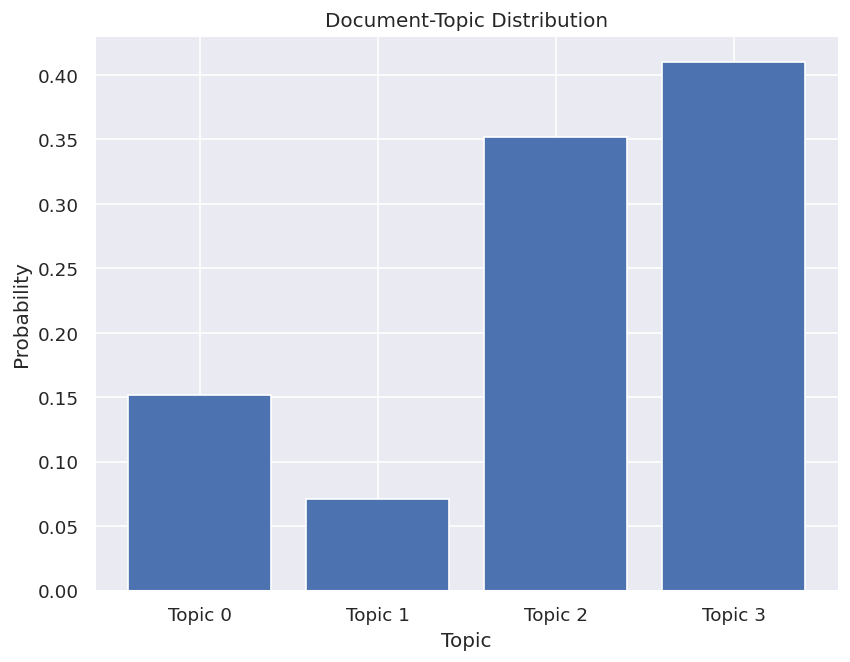

In [287]:
# Convert the document-topic distribution to a numpy array
doc_topic_array = np.array(doc_topic_dist)

# Plot the distribution as a bar chart
plt.bar(range(len(doc_topic_array)), doc_topic_array[:, 1])
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Document-Topic Distribution')
plt.xticks(range(len(doc_topic_array)), [f'Topic {i}' for i in range(len(doc_topic_array))])
plt.show()


## Sentiment Analysis


In [288]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px


In [289]:
# Create a function to get the subjectivity
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [290]:
# Create a function to get the polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [291]:
# Applying subjectivity and the polarity function to the respective columns
df2['Subjectivity'] = df2['Review'].apply(subjectivity)
df2['Polarity'] = df2['Review'].apply(polarity)

In [292]:
# Checking for created columns
df2['Polarity']


0       0.660000
1       0.606667
2       0.540000
3       0.500000
4       0.577500
          ...   
9995    0.292500
9996    0.186174
9997    0.124535
9998    0.470000
9999    0.079861
Name: Polarity, Length: 9955, dtype: float64

In [293]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [294]:
# Apply get analysis function to separate the sentiments from the column
df2['Analysis'] = df2['Polarity'].apply(getAnalysis)

In [295]:
# plot the polarity and subjectivity
fig = px.scatter(df2,
                 x='Polarity',
                 y='Subjectivity',
                 color = 'Analysis',
                 size='Subjectivity')

In [296]:
# Add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1,
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

- The histogram bars on the left side represent negative polarity, indicating a substantial number of reviews expressing negative sentiments.

- The histogram bars on the right side represent positive polarity, indicating a substantial number of reviews expressing positive sentiments.

- The plot allows for a quick and easy visualization of the sentiment polarity distribution of the reviews, helping to understand the overall sentiment of customers towards the restaurants.

# **Conclusion**

1. **Key Insights:** During this project, we analyzed restaurant data and reviews to provide valuable insights for Zomato and restaurant owners.

2. **Engagement and Retention:** AB's - Absolute Barbecues showed the highest engagement and retention with the maximum number of ratings on average, while Hotel Zara Hi-Fi had the lowest engagement with the lowest average rating.

3. **Price Points:** The price point for highly-rated restaurant AB's - Absolute Barbecues was around 1500, while the low-rated Hotel Zara Hi-Fi had a price point of 400.

4. **Popular Cuisines:** North Indian and Chinese cuisines were the most popular and in-demand among customers, offered by the majority of restaurants.

5. **Frequent Tags:** "Great Buffets" was the most frequently used tag, along with other popular tags like "great," "best," "north," and "Hyderabad."

6. **Popular Critic:** Critic Satwinder Singh was the most popular, with the highest number of followers and an average rating of 3.5.

7. **Restaurant Prices and Ratings:** Restaurant Collage - Hyatt Hyderabad Gachibowli was the most expensive with a price of 2800 and an average rating of 3.5. Meanwhile, restaurants like Amul and Mohammedia Shawarma were the least expensive with a price of 150 and an average rating of 3.9.

8. **Cluster Analysis:** Through clustering, we identified four distinct restaurant clusters: Cafe, Ice Creams and Desserts, International Cuisines, and Premium Continental Restaurants, and Local Street/Fast Food.

9. **Future Work:** Future work could involve building a recommendation system based on user ratings and preferences to enhance customer experience.

Overall, this project demonstrates the power of combining data analysis techniques to uncover valuable insights for Zomato and restaurant owners, contributing to improved decision-making and customer satisfaction.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***